# Agile Project Charter (Spring 1)

# Project: Fraudulent Transaction Detection - Milestone 1

**User Story:**
As a team member responsible for fraud detection, I want to collect a diverse dataset of financial transactions, ensuring data security and compliance with privacy regulations, to address the increasing occurrence of fraud for our client.

**Objective (Milestone 1 - Data Collection and Pre-processing):**
To collect a diverse dataset of financial transactions and implement data pre-processing for fraud detection, addressing missing values, and ensuring data quality and integrity.

**Project Details:**

*   **Project Lead:** Kishan
*     **Sprint:** Sprint 1
*   **Sprint Duration:** January 16, 2024 - January 18, 2024
*   **Submission Deadline:** LMS PI1 - Due by January 19, 2024, 23:59 +08

**Tasks:**

**Data Collection:**

* Collect a diverse dataset of financial transactions.
* Ensure data security measures during the collection process.
* Comply with privacy regulations to safeguard sensitive information.

**Data Pre-processing:**

* Address missing values in the dataset.
* Conduct data cleansing to ensure data quality and integrity.

**Submission Instructions:**

* Submit the completed task as either a .ipynb or .py file.

**Why:**
Addressing fraud is crucial for the client due to the increasing incidents of fraudulent transactions.

**How:**
By collecting a diverse dataset and implementing robust data pre-processing techniques, the project aims to enhance the accuracy and efficiency of fraud detection.


**Benefits:**

* Improved fraud detection capabilities.
* Enhanced data quality and integrity.
* Adherence to data security and privacy regulations.

This Agile project charter outlines the specifics of Milestone 1, providing a clear understanding of the tasks, responsible team member, sprint details, and submission requirements for achieving the objective of collecting a diverse dataset for fraudulent transaction detection.






In [474]:
# install pip

!pip install openpyxl

In [475]:
#import nescessary package

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


**Extract the dataset**

In [476]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [477]:
df = pd.read_excel('/content/drive/MyDrive/DS07/fraud_dataset.xlsx', sheet_name = None)

o check how many sheets are present in the Excel file and what their names are, you can use the sheet_names attribute of the pd.read_excel function.
This code opens the Excel file and retrieves the names of all sheets using pd.ExcelFile(file_path).sheet_names. It then prints the sheet names and the total number of sheets in the Excel file

In [478]:
file_path = '/content/drive/MyDrive/DS07/fraud_dataset.xlsx'

# Get the sheet names in the Excel file
sheet_names = pd.ExcelFile(file_path).sheet_names

# Display the sheet names
print("Sheet Names:", sheet_names)

# Count the number of sheets
num_sheets = len(sheet_names)
print("Number of Sheets:", num_sheets)

Sheet Names: ['DimChannel', 'DimCustomer', 'DimEmployee', 'DimGeography', 'DimProduct', 'DimProductCategory', 'DimProductSubcategory', 'DimPromotion', 'DimSales', 'DimSalesPerson', 'DimStore', 'FactInventory', 'FactSales']
Number of Sheets: 13


13 sheets in an Excel file, consisting of both dimension and fact tables. The sheets are categorized into dimensions (Dim) and fact tables (Fact).

**The task is to perform the following operations:**

**Read Data:**

* Use the **read_excel** function to import data from each sheet into separate dataframes.

**Explore Data:**

* Apply the **head()** function to preview the initial rows of each dataframe.
* Utilize the **info()** function to obtain a summary of each dataframe, including data types and non-null counts.

**Analyze Dimensions:**

* For each dimension sheet **(Dim)**, use the **unique()** function to identify unique
  keys within the respective dataframe.
* Apply **nunique()** to count the number of unique keys for each dimension,     gaining insights into the cardinality of the data.

By following these steps systematically analyze and explore the  data, ensuring a thorough understanding of both dimensions and fact tables in the Excel file.

#no.1 'DimChannel'

In [479]:
# Specify the sheet name
sheet_to_read = 'DimChannel'

# Read the specified sheet into a DataFrame
df_dim_channel = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimChannel' DataFrame
df_dim_channel.head()


,ChannelKey,ChannelLabel,ChannelName,ChannelDescription,ETLLoadID,LoadDate,UpdateDate
0,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19
1,2,2,Online,Online,1,2009-07-11 14:43:19,2009-07-11 14:43:19
2,3,3,Catalog,Catalog,1,2009-07-11 14:43:19,2009-07-11 14:43:19
3,4,4,Reseller,Reseller,1,2009-07-11 14:43:19,2009-07-11 14:43:19


In [480]:
df_dim_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ChannelKey          4 non-null      int64         
 1   ChannelLabel        4 non-null      int64         
 2   ChannelName         4 non-null      object        
 3   ChannelDescription  4 non-null      object        
 4   ETLLoadID           4 non-null      int64         
 5   LoadDate            4 non-null      datetime64[ns]
 6   UpdateDate          4 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 352.0+ bytes


In [481]:
df_dim_channel.isnull().sum()

ChannelKey            0
ChannelLabel          0
ChannelName           0
ChannelDescription    0
ETLLoadID             0
LoadDate              0
UpdateDate            0
dtype: int64

Based on the information provided by the info() method, it appears that there are no null (NaN) values in any of the columns of the 'DimChannel' DataFrame. The "Non-Null Count" column indicates that each column has 4 non-null entries, which is consistent with the total number of entries (rows) in the DataFrame.

All columns have 4 non-null entries, indicating that there are no missing values in the DataFrame.

In [482]:
df_dim_channel.keys()

Index(['ChannelKey', 'ChannelLabel', 'ChannelName', 'ChannelDescription',
       'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

use the **nunique() and unique()** methods to get the number of unique values and the actual unique values for each column.

this code snippet prints both the number of unique values **(nunique()**) and the unique values **(unique())** for each specified column in the** 'DimChannel'** DataFrame.

In [483]:
# Columns of interest
columns_of_interest = ['ChannelKey', 'ChannelLabel', 'ChannelName', 'ChannelDescription', 'ETLLoadID', 'LoadDate', 'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_dim_channel[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_dim_channel[column].unique()}")


Number of Unique Values:
ChannelKey            4
ChannelLabel          4
ChannelName           4
ChannelDescription    4
ETLLoadID             1
LoadDate              1
UpdateDate            1
dtype: int64

Unique Values:
ChannelKey: [1 2 3 4]
ChannelLabel: [1 2 3 4]
ChannelName: ['Store' 'Online' 'Catalog' 'Reseller']
ChannelDescription: ['Store' 'Online' 'Catalog' 'Reseller']
ETLLoadID: [1]
LoadDate: ['2009-07-11T14:43:19.000000000']
UpdateDate: ['2009-07-11T14:43:19.000000000']


The output indicates the number of unique values and the actual unique values for each specified column in the 'DimChannel' DataFrame

It appears that some columns have a limited set of unique values, while others have only one unique value. For example, 'ETLLoadID', 'LoadDate', and 'UpdateDate' have only one unique value each.

#No.2 'DimCustomer'

In [484]:
# Specify the sheet name
sheet_to_read = 'DimCustomer'

# Read the specified sheet into a DataFrame
df_Dim_Customer = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Customer.head()

,CustomerKey,GeographyKey,CustomerLabel,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CustomerType,CompanyName,ETLLoadID,LoadDate,UpdateDate,Rating
0,1,680,11000,NaN,Jon,V,Yang,0,1966-04-08,M,...,3761 N. 14th St,NaN,1 (11) 500 555-0162,2001-07-22,Person,NaN,1,2009-10-01,2009-10-01,1
1,2,692,11001,NaN,Eugene,L,Huang,0,1965-05-14,S,...,2243 W St.,NaN,1 (11) 500 555-0110,2001-07-18,Person,NaN,1,2009-10-01,2009-10-01,1
2,3,493,11002,NaN,Ruben,NaN,Torres,0,1965-08-12,M,...,5844 Linden Land,NaN,1 (11) 500 555-0184,2001-07-10,Person,NaN,1,2009-10-01,2009-10-01,4
3,4,519,11003,NaN,Christy,NaN,Zhu,0,1968-02-15,S,...,1825 Village Pl.,NaN,1 (11) 500 555-0162,2001-07-01,Person,NaN,1,2009-10-01,2009-10-01,3
4,5,706,11004,NaN,Elizabeth,NaN,Johnson,0,1968-08-08,S,...,7553 Harness Circle,NaN,1 (11) 500 555-0131,2001-07-26,Person,NaN,1,2009-10-01,2009-10-01,5


In [485]:
df_Dim_Customer.keys()

Index(['CustomerKey', 'GeographyKey', 'CustomerLabel', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'NameStyle', 'BirthDate', 'MaritalStatus',
       'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CustomerType', 'CompanyName', 'ETLLoadID',
       'LoadDate', 'UpdateDate', 'Rating'],
      dtype='object')

In [486]:
df_Dim_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18869 non-null  int64         
 1   GeographyKey          18869 non-null  int64         
 2   CustomerLabel         18869 non-null  object        
 3   Title                 101 non-null    object        
 4   FirstName             18484 non-null  object        
 5   MiddleName            10654 non-null  object        
 6   LastName              18484 non-null  object        
 7   NameStyle             18869 non-null  int64         
 8   BirthDate             18484 non-null  datetime64[ns]
 9   MaritalStatus         18484 non-null  object        
 10  Suffix                3 non-null      object        
 11  Gender                18484 non-null  object        
 12  EmailAddress          18484 non-null  object        
 13  YearlyIncome    

In [487]:
df_Dim_Customer.isnull().sum()

CustomerKey                 0
GeographyKey                0
CustomerLabel               0
Title                   18768
FirstName                 385
MiddleName               8215
LastName                  385
NameStyle                   0
BirthDate                 385
MaritalStatus             385
Suffix                  18866
Gender                    385
EmailAddress              385
YearlyIncome                0
TotalChildren             385
NumberChildrenAtHome      385
Education                 385
Occupation                385
HouseOwnerFlag            385
NumberCarsOwned           385
AddressLine1              385
AddressLine2            18557
Phone                     385
DateFirstPurchase         385
CustomerType                0
CompanyName             18484
ETLLoadID                   0
LoadDate                    0
UpdateDate                  0
Rating                      0
dtype: int64

Based on the information provided by the info() method, it appears that there are missing values **(NaN)** in several columns of the 'DimCustomer' DataFrame. Here are some columns with missing values:

**Columns with significant missing values:**

* Title: 18768 missing values out of 18869 entries
* MiddleName: 8221 missing values out of 18869 entries
* Suffix: 18866 missing values out of 18869 entries
* EmailAddress: 1885 missing values out of 18869 entries
* TotalChildren: 385 missing values out of 18869 entries
* NumberChildrenAtHome: 385 missing values out of 18869 entries
* HouseOwnerFlag: 385 missing values out of 18869 entries
* NumberCarsOwned: 385 missing values out of 18869 entries
* AddressLine2: 18557 missing values out of 18869 entries
* CompanyName: 18484 missing values out of 18869 entries

**Columns with fewer missing values:**

* FirstName: 385 missing values out of 18869 entries
* LastName: 385 missing values out of 18869 entries
* BirthDate: 385 missing values out of 18869 entries
* MaritalStatus: 385 missing values out of 18869 entries
* Gender: 385 missing values out of 18869 entries
* Education: 385 missing values out of 18869 entries
* Occupation: 385 missing values out of 18869 entries
* AddressLine1: 385 missing values out of 18869 entries
* Phone: 385 missing values out of 18869 entries
* DateFirstPurchase: 385 missing values out of 18869 entries

handle missing values using the fillna() method, can choose a strategy to fill the NaN values with a specific value or a calculated value.

can use the fillna() method to replace NaN values with a specified value, such as 0.





In [488]:
# Read the specified sheet into a DataFrame
df_Dim_Customer = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Filling missing values for different types of columns
df_Dim_Customer['Title'].fillna('0', inplace=True)
df_Dim_Customer['MiddleName'].fillna('', inplace=True)
df_Dim_Customer['Suffix'].fillna('0', inplace=True)
df_Dim_Customer['EmailAddress'].fillna('0', inplace=True)
df_Dim_Customer['TotalChildren'].fillna(0, inplace=True)
df_Dim_Customer['NumberChildrenAtHome'].fillna(0, inplace=True)
df_Dim_Customer['HouseOwnerFlag'].fillna(0, inplace=True)
df_Dim_Customer['NumberCarsOwned'].fillna(0, inplace=True)
df_Dim_Customer['AddressLine2'].fillna('', inplace=True)
df_Dim_Customer['CompanyName'].fillna('0', inplace=True)

# Columns with fewer missing values
columns_to_fill = ['FirstName', 'LastName', 'BirthDate', 'MaritalStatus', 'Gender',
                    'Education', 'Occupation', 'AddressLine1', 'Phone', 'DateFirstPurchase']

# Fill missing values with a specific placeholder value (you can change 'Unknown' to your desired value)
df_Dim_Customer[columns_to_fill] = df_Dim_Customer[columns_to_fill].fillna('0')

df_Dim_Customer.head()

,CustomerKey,GeographyKey,CustomerLabel,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CustomerType,CompanyName,ETLLoadID,LoadDate,UpdateDate,Rating
0,1,680,11000,0,Jon,V,Yang,0,1966-04-08 00:00:00,M,...,3761 N. 14th St,,1 (11) 500 555-0162,2001-07-22 00:00:00,Person,0,1,2009-10-01,2009-10-01,1
1,2,692,11001,0,Eugene,L,Huang,0,1965-05-14 00:00:00,S,...,2243 W St.,,1 (11) 500 555-0110,2001-07-18 00:00:00,Person,0,1,2009-10-01,2009-10-01,1
2,3,493,11002,0,Ruben,,Torres,0,1965-08-12 00:00:00,M,...,5844 Linden Land,,1 (11) 500 555-0184,2001-07-10 00:00:00,Person,0,1,2009-10-01,2009-10-01,4
3,4,519,11003,0,Christy,,Zhu,0,1968-02-15 00:00:00,S,...,1825 Village Pl.,,1 (11) 500 555-0162,2001-07-01 00:00:00,Person,0,1,2009-10-01,2009-10-01,3
4,5,706,11004,0,Elizabeth,,Johnson,0,1968-08-08 00:00:00,S,...,7553 Harness Circle,,1 (11) 500 555-0131,2001-07-26 00:00:00,Person,0,1,2009-10-01,2009-10-01,5


In [489]:
df_Dim_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18869 non-null  int64         
 1   GeographyKey          18869 non-null  int64         
 2   CustomerLabel         18869 non-null  object        
 3   Title                 18869 non-null  object        
 4   FirstName             18869 non-null  object        
 5   MiddleName            18869 non-null  object        
 6   LastName              18869 non-null  object        
 7   NameStyle             18869 non-null  int64         
 8   BirthDate             18869 non-null  object        
 9   MaritalStatus         18869 non-null  object        
 10  Suffix                18869 non-null  object        
 11  Gender                18869 non-null  object        
 12  EmailAddress          18869 non-null  object        
 13  YearlyIncome    

In [490]:
df_Dim_Customer.isnull().sum()

CustomerKey             0
GeographyKey            0
CustomerLabel           0
Title                   0
FirstName               0
MiddleName              0
LastName                0
NameStyle               0
BirthDate               0
MaritalStatus           0
Suffix                  0
Gender                  0
EmailAddress            0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
Occupation              0
HouseOwnerFlag          0
NumberCarsOwned         0
AddressLine1            0
AddressLine2            0
Phone                   0
DateFirstPurchase       0
CustomerType            0
CompanyName             0
ETLLoadID               0
LoadDate                0
UpdateDate              0
Rating                  0
dtype: int64

It looks like the missing values have been successfully filled in the 'DimCustomer' DataFrame based on the specified strategy. Now, each column has the same number of non-null entries, indicating that missing values have been handled.

Here's a summary of the updated DataFrame:

* All columns have 18,869 non-null entries, meaning there are no missing values.
* The Dtype of columns such as 'FirstName', 'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'Education', 'Occupation', and 'AddressLine1' has been maintained as 'object'.
* Columns with numerical data types (float64 and int64) continue to have the same data types.



use the nunique() and unique() methods to get the number of unique values and the actual unique values for each column.

this code snippet prints both the number of unique values (nunique()) and the unique values (unique()) for each specified column in the** 'DimChannel'** DataFrame.

In [491]:
# Columns of interest
columns_of_interest = ['CustomerKey', 'GeographyKey', 'CustomerLabel', 'Title', 'FirstName',
                        'MiddleName', 'LastName', 'NameStyle', 'BirthDate', 'MaritalStatus',
                        'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren',
                        'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
                        'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
                        'DateFirstPurchase', 'CustomerType', 'CompanyName', 'ETLLoadID',
                        'LoadDate', 'UpdateDate', 'Rating']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Customer[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Customer[column].unique()}")


Number of Unique Values:
CustomerKey             18869
GeographyKey              476
CustomerLabel           18869
Title                       6
FirstName                 671
MiddleName                 45
LastName                  376
NameStyle                   2
BirthDate                8253
MaritalStatus               3
Suffix                      2
Gender                      3
EmailAddress            18485
YearlyIncome               17
TotalChildren               6
NumberChildrenAtHome        6
Education                   6
Occupation                  6
HouseOwnerFlag              2
NumberCarsOwned             5
AddressLine1            12803
AddressLine2              167
Phone                    8891
DateFirstPurchase        1125
CustomerType                2
CompanyName               386
ETLLoadID                   1
LoadDate                    1
UpdateDate                  1
Rating                      5
dtype: int64

Unique Values:
CustomerKey: [    1     2     3 ... 19143 1914

# NO.3  DimEmployee

In [492]:
# Specify the sheet name
sheet_to_read = 'DimEmployee'

# Read the specified sheet into a DataFrame
df_Dim_Employee = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Employee.head()

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,MiddleName,Title,HireDate,BirthDate,EmailAddress,Phone,...,DepartmentName,StartDate,EndDate,Status,ETLLoadID,LoadDate,UpdateDate,Employee Marital Status,Employee Gender,Employee Base Rate
0,35,10.0,Roy,Antebi,NaN,NaN,1999-01-08,1973-08-27,jianshuo0@contoso.com,952-555-0178,...,Production,1999-01-08,NaT,Current,1,2009-08-01,2009-08-01,Single,Male,25.0
1,39,6.0,Zainal,Arifin,NaN,NaN,1999-01-09,1980-06-17,simon0@contoso.com,963-555-0134,...,Production,1999-01-09,NaT,Current,1,2009-08-01,2009-08-01,Single,Male,25.0
2,41,6.0,Ties,Arts,NaN,NaN,1999-01-10,1974-12-19,michael0@contoso.com,218-555-0126,...,Production,1999-01-10,NaT,Current,1,2009-08-01,2009-08-01,Single,Male,25.0
3,45,6.0,Chris,Ashton,NaN,NaN,1999-01-13,1962-12-27,russell0@contoso.com,786-555-0144,...,Production,1999-01-13,NaT,Current,1,2009-08-01,2009-08-01,Married,Male,25.0
4,47,6.0,Vivian,Atlas,NaN,NaN,1999-01-13,1979-07-27,fred0@contoso.com,818-555-0192,...,Production,1999-01-13,NaT,Current,1,2009-08-01,2009-08-01,Single,Male,25.0


In [493]:
df_Dim_Employee.keys()

Index(['EmployeeKey', 'ParentEmployeeKey', 'FirstName', 'LastName',
       'MiddleName', 'Title', 'HireDate', 'BirthDate', 'EmailAddress', 'Phone',
       'MaritalStatus', 'EmergencyContactName', 'EmergencyContactPhone',
       'SalariedFlag', 'Gender', 'PayFrequency', 'VacationHours',
       'CurrentFlag', 'SalesPersonFlag', 'DepartmentName', 'StartDate',
       'EndDate', 'Status', 'ETLLoadID', 'LoadDate', 'UpdateDate',
       'Employee Marital Status', 'Employee Gender', 'Employee Base Rate'],
      dtype='object')

In [494]:
df_Dim_Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeKey              293 non-null    int64         
 1   ParentEmployeeKey        292 non-null    float64       
 2   FirstName                293 non-null    object        
 3   LastName                 293 non-null    object        
 4   MiddleName               14 non-null     object        
 5   Title                    0 non-null      float64       
 6   HireDate                 293 non-null    datetime64[ns]
 7   BirthDate                293 non-null    datetime64[ns]
 8   EmailAddress             293 non-null    object        
 9   Phone                    293 non-null    object        
 10  MaritalStatus            293 non-null    object        
 11  EmergencyContactName     293 non-null    object        
 12  EmergencyContactPhone    293 non-nul

In [495]:
df_Dim_Employee.isnull().sum()

EmployeeKey                  0
ParentEmployeeKey            1
FirstName                    0
LastName                     0
MiddleName                 279
Title                      293
HireDate                     0
BirthDate                    0
EmailAddress                 0
Phone                        0
MaritalStatus                0
EmergencyContactName         0
EmergencyContactPhone        0
SalariedFlag                 0
Gender                       0
PayFrequency                 0
VacationHours                0
CurrentFlag                  0
SalesPersonFlag              0
DepartmentName               0
StartDate                    0
EndDate                    287
Status                       6
ETLLoadID                    0
LoadDate                     0
UpdateDate                   0
Employee Marital Status      0
Employee Gender              0
Employee Base Rate           0
dtype: int64

In [496]:
# Read the specified sheet into a DataFrame
df_Dim_Employee = pd.read_excel(file_path, sheet_name=sheet_to_read)

df_Dim_Employee['MiddleName'].fillna(0, inplace=True)
df_Dim_Employee['Title'].fillna(0, inplace=True)
df_Dim_Employee['EndDate'].fillna(0, inplace=True)



df_Dim_Employee.isnull().sum()

EmployeeKey                0
ParentEmployeeKey          1
FirstName                  0
LastName                   0
MiddleName                 0
Title                      0
HireDate                   0
BirthDate                  0
EmailAddress               0
Phone                      0
MaritalStatus              0
EmergencyContactName       0
EmergencyContactPhone      0
SalariedFlag               0
Gender                     0
PayFrequency               0
VacationHours              0
CurrentFlag                0
SalesPersonFlag            0
DepartmentName             0
StartDate                  0
EndDate                    0
Status                     6
ETLLoadID                  0
LoadDate                   0
UpdateDate                 0
Employee Marital Status    0
Employee Gender            0
Employee Base Rate         0
dtype: int64

In [497]:
# Columns of interest
columns_of_interest = ['EmployeeKey', 'ParentEmployeeKey', 'FirstName', 'LastName',
       'MiddleName', 'Title', 'HireDate', 'BirthDate', 'EmailAddress', 'Phone',
       'MaritalStatus', 'EmergencyContactName', 'EmergencyContactPhone',
       'SalariedFlag', 'Gender', 'PayFrequency', 'VacationHours',
       'CurrentFlag', 'SalesPersonFlag', 'DepartmentName', 'StartDate',
       'EndDate', 'Status', 'ETLLoadID', 'LoadDate', 'UpdateDate',
       'Employee Marital Status', 'Employee Gender', 'Employee Base Rate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Employee[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Employee[column].unique()}")


Number of Unique Values:
EmployeeKey                293
ParentEmployeeKey           11
FirstName                  234
LastName                   288
MiddleName                  10
Title                        1
HireDate                   164
BirthDate                  276
EmailAddress               293
Phone                      285
MaritalStatus                2
EmergencyContactName       293
EmergencyContactPhone      285
SalariedFlag                 2
Gender                       2
PayFrequency                 2
VacationHours               99
CurrentFlag                  1
SalesPersonFlag              2
DepartmentName              17
StartDate                  170
EndDate                      7
Status                       1
ETLLoadID                    1
LoadDate                     1
UpdateDate                   1
Employee Marital Status      2
Employee Gender              2
Employee Base Rate           4
dtype: int64

Unique Values:
EmployeeKey: [ 35  39  41  45  47  50  54  55  

#NO.4 DimGeography

In [498]:
# Specify the sheet name
sheet_to_read = 'DimGeography'

# Read the specified sheet into a DataFrame
df_Dim_Geography = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Geography.head()

,GeographyKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,Geometry,ETLLoadID,LoadDate,UpdateDate
0,782,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
1,783,City,North America,Alexandria,Virginia,United States,POINT (-79.1436 38.5309),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
2,784,City,North America,Anchorage,Alaska,United States,POINT (-149.628 61.1147),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
3,785,City,North America,Annapolis,Maryland,United States,POINT (-76.5427 38.9884),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
4,786,City,North America,Appleton,Wisconsin,United States,POINT (-88.4981 44.2772),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760


In [499]:
df_Dim_Geography.keys()

Index(['GeographyKey', 'GeographyType', 'ContinentName', 'CityName',
       'StateProvinceName', 'RegionCountryName', 'Geometry', 'ETLLoadID',
       'LoadDate', 'UpdateDate'],
      dtype='object')

In [500]:
df_Dim_Geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GeographyKey       674 non-null    int64         
 1   GeographyType      674 non-null    object        
 2   ContinentName      674 non-null    object        
 3   CityName           517 non-null    object        
 4   StateProvinceName  637 non-null    object        
 5   RegionCountryName  671 non-null    object        
 6   Geometry           564 non-null    object        
 7   ETLLoadID          674 non-null    int64         
 8   LoadDate           674 non-null    datetime64[ns]
 9   UpdateDate         674 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 52.8+ KB


In [501]:
df_Dim_Geography.isnull().sum()

GeographyKey           0
GeographyType          0
ContinentName          0
CityName             157
StateProvinceName     37
RegionCountryName      3
Geometry             110
ETLLoadID              0
LoadDate               0
UpdateDate             0
dtype: int64

In [502]:
# Fill missing values with a specific value or strategy
df_Dim_Geography['CityName'].fillna('Unknown', inplace=True)
df_Dim_Geography['StateProvinceName'].fillna('Unknown', inplace=True)
df_Dim_Geography['RegionCountryName'].fillna('Unknown', inplace=True)
df_Dim_Geography['Geometry'].fillna('Unknown', inplace=True)

# If you want to drop rows with missing values
# df_Dim_Geography.dropna(inplace=True)


In [503]:
df_Dim_Geography.isnull().sum()

GeographyKey         0
GeographyType        0
ContinentName        0
CityName             0
StateProvinceName    0
RegionCountryName    0
Geometry             0
ETLLoadID            0
LoadDate             0
UpdateDate           0
dtype: int64

In [504]:
# Columns of interest
columns_of_interest = ['GeographyKey', 'GeographyType', 'ContinentName', 'CityName',
       'StateProvinceName', 'RegionCountryName', 'Geometry', 'ETLLoadID',
       'LoadDate', 'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Geography[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Geography[column].unique()}")

Number of Unique Values:
GeographyKey         674
GeographyType          4
ContinentName          3
CityName             512
StateProvinceName    126
RegionCountryName     35
Geometry             562
ETLLoadID              1
LoadDate               6
UpdateDate             6
dtype: int64

Unique Values:
GeographyKey: [782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799
 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817
 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835
 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853
 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871
 872 873 874 875 876 877 878 879 880 882 883 884 885 886 887 888 889 890
 891 892 893 894 895 896 897 898 899 900 901 902 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927
 928 929 930 931 932 933 934 935 936 937 938 939 940 941 943 944 945 946
 947 948 949 950 951 952 

# N0.5 DimProduct

In [505]:
# Specify the sheet name
sheet_to_read = 'DimProduct'

# Read the specified sheet into a DataFrame
df_Dim_Product = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Product.head()

,ProductKey,ProductLabel,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassID,ClassName,StyleID,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,416,303001,Adventure Works Desktop PC2.33 XD233 Silver,"2.33GHz dual processor, 4MB L2 cache, 750GB 72...",17,Adventure Works,Adventure Works,3,Deluxe,1.0,...,321.05,969.00,2008-12-09,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
1,417,303002,Adventure Works Desktop PC2.30 MD230 Silver,"2.3GHz dual processor, 4 GB DDR2 SDRAM memorie...",17,Adventure Works,Adventure Works,2,Regular,1.0,...,275.46,599.00,2008-01-08,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
2,418,303003,Adventure Works Desktop PC1.60 ED160 Silver,"1.60GHz dual processor, 1GB DDR2 memory, 30GB ...",17,Adventure Works,Adventure Works,1,Economy,1.0,...,137.63,269.95,2005-05-06,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
3,423,303008,Adventure Works Desktop PC2.30 MD230 Black,"2.3GHz dual processor, 4 GB DDR2 SDRAM memorie...",17,Adventure Works,Adventure Works,2,Regular,1.0,...,275.46,599.00,2008-01-08,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
4,429,303014,Adventure Works Desktop PC2.30 MD230 Brown,"2.3GHz dual processor, 4 GB DDR2 SDRAM memorie...",17,Adventure Works,Adventure Works,2,Regular,1.0,...,275.87,599.90,2008-01-08,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31


In [506]:
df_Dim_Product.keys()

Index(['ProductKey', 'ProductLabel', 'ProductName', 'ProductDescription',
       'ProductSubcategoryKey', 'Manufacturer', 'BrandName', 'ClassID',
       'ClassName', 'StyleID', 'StyleName', 'ColorID', 'ColorName', 'Size',
       'SizeRange', 'SizeUnitMeasureID', 'Weight', 'WeightUnitMeasureID',
       'UnitOfMeasureID', 'UnitOfMeasureName', 'StockTypeID', 'StockTypeName',
       'UnitCost', 'UnitPrice', 'AvailableForSaleDate', 'StopSaleDate',
       'Status', 'ImageURL', 'ProductURL', 'ETLLoadID', 'LoadDate',
       'UpdateDate'],
      dtype='object')

In [507]:
df_Dim_Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             2517 non-null   int64         
 1   ProductLabel           2517 non-null   int64         
 2   ProductName            2517 non-null   object        
 3   ProductDescription     2516 non-null   object        
 4   ProductSubcategoryKey  2517 non-null   int64         
 5   Manufacturer           2517 non-null   object        
 6   BrandName              2517 non-null   object        
 7   ClassID                2517 non-null   int64         
 8   ClassName              2517 non-null   object        
 9   StyleID                2487 non-null   float64       
 10  StyleName              2517 non-null   object        
 11  ColorID                2517 non-null   int64         
 12  ColorName              2517 non-null   object        
 13  Siz

In [508]:
df_Dim_Product.isnull().sum()

ProductKey                  0
ProductLabel                0
ProductName                 0
ProductDescription          1
ProductSubcategoryKey       0
Manufacturer                0
BrandName                   0
ClassID                     0
ClassName                   0
StyleID                    30
StyleName                   0
ColorID                     0
ColorName                   0
Size                      570
SizeRange                2517
SizeUnitMeasureID        2517
Weight                    284
WeightUnitMeasureID       222
UnitOfMeasureID             0
UnitOfMeasureName           0
StockTypeID                 0
StockTypeName               0
UnitCost                    0
UnitPrice                   0
AvailableForSaleDate        1
StopSaleDate             2517
Status                    295
ImageURL                 2517
ProductURL               2517
ETLLoadID                   0
LoadDate                    0
UpdateDate                  0
dtype: int64

In [509]:
# Example: Fill StyleID, Size, Weight, and Status with appropriate defaults
df_Dim_Product['StyleID'].fillna(-1, inplace=True)  # Assuming -1 as a placeholder for missing StyleID
df_Dim_Product['Size'].fillna('Unknown', inplace=True)
df_Dim_Product['Weight'].fillna(df_Dim_Product['Weight'].mean(), inplace=True)  # Fill with mean weight
df_Dim_Product['WeightUnitMeasureID'].fillna('Unknown', inplace=True)
df_Dim_Product['Status'].fillna('Unknown', inplace=True)

df_Dim_Product['SizeRange'].fillna(0, inplace=True)
df_Dim_Product['SizeUnitMeasureID'].fillna(0, inplace=True)
df_Dim_Product['StopSaleDate'].fillna(0, inplace=True)
df_Dim_Product['ImageURL'].fillna(0, inplace=True)
df_Dim_Product['ProductURL'].fillna(0, inplace=True)


In [510]:
df_Dim_Product.isnull().sum()

ProductKey               0
ProductLabel             0
ProductName              0
ProductDescription       1
ProductSubcategoryKey    0
Manufacturer             0
BrandName                0
ClassID                  0
ClassName                0
StyleID                  0
StyleName                0
ColorID                  0
ColorName                0
Size                     0
SizeRange                0
SizeUnitMeasureID        0
Weight                   0
WeightUnitMeasureID      0
UnitOfMeasureID          0
UnitOfMeasureName        0
StockTypeID              0
StockTypeName            0
UnitCost                 0
UnitPrice                0
AvailableForSaleDate     1
StopSaleDate             0
Status                   0
ImageURL                 0
ProductURL               0
ETLLoadID                0
LoadDate                 0
UpdateDate               0
dtype: int64

In [511]:
# Columns of interest
columns_of_interest = ['ProductKey', 'ProductLabel', 'ProductName', 'ProductDescription',
       'ProductSubcategoryKey', 'Manufacturer', 'BrandName', 'ClassID',
       'ClassName', 'StyleID', 'StyleName', 'ColorID', 'ColorName', 'Size',
       'SizeRange', 'SizeUnitMeasureID', 'Weight', 'WeightUnitMeasureID',
       'UnitOfMeasureID', 'UnitOfMeasureName', 'StockTypeID', 'StockTypeName',
       'UnitCost', 'UnitPrice', 'AvailableForSaleDate', 'StopSaleDate',
       'Status', 'ImageURL', 'ProductURL', 'ETLLoadID', 'LoadDate',
       'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Product[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Product[column].unique()}")

Number of Unique Values:
ProductKey               2517
ProductLabel             2517
ProductName              2517
ProductDescription        717
ProductSubcategoryKey      32
Manufacturer               11
BrandName                  11
ClassID                     3
ClassName                   3
StyleID                    23
StyleName                2517
ColorID                    16
ColorName                  16
Size                      622
SizeRange                   1
SizeUnitMeasureID           1
Weight                    297
WeightUnitMeasureID         4
UnitOfMeasureID             2
UnitOfMeasureName           2
StockTypeID                 3
StockTypeName               3
UnitCost                  480
UnitPrice                 426
AvailableForSaleDate      354
StopSaleDate                1
Status                      2
ImageURL                    1
ProductURL                  1
ETLLoadID                  18
LoadDate                  146
UpdateDate                146
dtype: int64

U

#No.6 DimProductCategory

In [512]:
# Specify the sheet name
sheet_to_read = 'DimProductCategory'

# Read the specified sheet into a DataFrame
df_Dim_ProductCategory = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_ProductCategory.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID,LoadDate,UpdateDate
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07
1,2,2,TV and Video,TV and Video,1,2009-07-07,2009-07-07
2,3,3,Computers,Computers,1,2009-07-07,2009-07-07
3,4,4,Cameras and camcorders,Cameras and camcorders,1,2009-07-07,2009-07-07
4,5,5,Cell phones,Cell phones,1,2009-07-07,2009-07-07


In [513]:
df_Dim_ProductCategory.keys()

Index(['ProductCategoryKey', 'ProductCategoryLabel', 'ProductCategoryName',
       'ProductCategoryDescription', 'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

In [514]:
df_Dim_ProductCategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ProductCategoryKey          8 non-null      int64         
 1   ProductCategoryLabel        8 non-null      int64         
 2   ProductCategoryName         8 non-null      object        
 3   ProductCategoryDescription  8 non-null      object        
 4   ETLLoadID                   8 non-null      int64         
 5   LoadDate                    8 non-null      datetime64[ns]
 6   UpdateDate                  8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 576.0+ bytes


In [515]:
df_Dim_ProductCategory.isnull().sum()

ProductCategoryKey            0
ProductCategoryLabel          0
ProductCategoryName           0
ProductCategoryDescription    0
ETLLoadID                     0
LoadDate                      0
UpdateDate                    0
dtype: int64

In [516]:
# Columns of interest
columns_of_interest = ['ProductCategoryKey', 'ProductCategoryLabel', 'ProductCategoryName',
       'ProductCategoryDescription', 'ETLLoadID', 'LoadDate', 'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_ProductCategory[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_ProductCategory[column].unique()}")

Number of Unique Values:
ProductCategoryKey            8
ProductCategoryLabel          8
ProductCategoryName           8
ProductCategoryDescription    8
ETLLoadID                     1
LoadDate                      1
UpdateDate                    1
dtype: int64

Unique Values:
ProductCategoryKey: [1 2 3 4 5 6 7 8]
ProductCategoryLabel: [1 2 3 4 5 6 7 8]
ProductCategoryName: ['Audio' 'TV and Video' 'Computers' 'Cameras and camcorders' 'Cell phones'
 'Music, Movies and Audio Books' 'Games and Toys' 'Home Appliances']
ProductCategoryDescription: ['Audio' 'TV and Video' 'Computers' 'Cameras and camcorders' 'Cell phones'
 'Music, Movies and Audio Books' 'Games and Toys' 'Home Appliances']
ETLLoadID: [1]
LoadDate: ['2009-07-07T00:00:00.000000000']
UpdateDate: ['2009-07-07T00:00:00.000000000']


#No.7 DimProductSubcategory

In [517]:
# Specify the sheet name
sheet_to_read = 'DimProductSubcategory'

# Read the specified sheet into a DataFrame
df_Dim_Product_Subcategory = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Product_Subcategory.head()

,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,ProductSubcategoryDescription,ProductCategoryKey,ETLLoadID,LoadDate,UpdateDate
0,1,101,MP4&MP3,MP4&MP3,1,1,2009-07-07,2009-07-07
1,2,102,Recorder,Recorder,1,1,2009-07-07,2009-07-07
2,3,103,Radio,Radio,1,1,2009-07-07,2009-07-07
3,4,104,Recording Pen,Recording Pen,1,1,2009-07-07,2009-07-07
4,5,105,Headphones,Headphones,1,1,2009-07-07,2009-07-07


In [518]:
df_Dim_Product_Subcategory.keys()

Index(['ProductSubcategoryKey', 'ProductSubcategoryLabel',
       'ProductSubcategoryName', 'ProductSubcategoryDescription',
       'ProductCategoryKey', 'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

In [519]:
df_Dim_Product_Subcategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductSubcategoryKey          44 non-null     int64         
 1   ProductSubcategoryLabel        44 non-null     int64         
 2   ProductSubcategoryName         44 non-null     object        
 3   ProductSubcategoryDescription  44 non-null     object        
 4   ProductCategoryKey             44 non-null     int64         
 5   ETLLoadID                      44 non-null     int64         
 6   LoadDate                       44 non-null     datetime64[ns]
 7   UpdateDate                     44 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 2.9+ KB


In [520]:
df_Dim_Product_Subcategory.isnull().sum()

ProductSubcategoryKey            0
ProductSubcategoryLabel          0
ProductSubcategoryName           0
ProductSubcategoryDescription    0
ProductCategoryKey               0
ETLLoadID                        0
LoadDate                         0
UpdateDate                       0
dtype: int64

In [521]:
# Columns of interest
columns_of_interest = ['ProductSubcategoryKey', 'ProductSubcategoryLabel',
       'ProductSubcategoryName', 'ProductSubcategoryDescription',
       'ProductCategoryKey', 'ETLLoadID', 'LoadDate', 'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Product_Subcategory[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Product_Subcategory[column].unique()}")

Number of Unique Values:
ProductSubcategoryKey            44
ProductSubcategoryLabel          44
ProductSubcategoryName           44
ProductSubcategoryDescription    44
ProductCategoryKey                8
ETLLoadID                         1
LoadDate                          1
UpdateDate                        1
dtype: int64

Unique Values:
ProductSubcategoryKey: [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 29 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48]
ProductSubcategoryLabel: [101 102 103 104 105 106 107 108 201 202 203 205 206 301 302 303 304 305
 306 307 308 401 402 403 405 406 501 503 504 505 601 602 603 701 702 703
 801 802 803 804 805 806 807 808]
ProductSubcategoryName: ['MP4&MP3' 'Recorder' 'Radio' 'Recording Pen' 'Headphones'
 'Bluetooth Headphones' 'Speakers' 'Audio Accessories' 'Televisions'
 'VCD & DVD' 'Home Theater System' 'Car Video' 'TV & Video Accessories'
 'Laptops' 'Netbooks' 'Desktops' 'Monitors' 'Projectors & Screens'
 'Pr

#No.8 DimPromotion

In [522]:
# Specify the sheet name
sheet_to_read = 'DimPromotion'

# Read the specified sheet into a DataFrame
df_Dim_Promotion = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Promotion.head()

,PromotionKey,PromotionLabel,PromotionName,PromotionDescription,DiscountPercent,PromotionType,PromotionCategory,StartDate,EndDate,MinQuantity,MaxQuantity,ETLLoadID,LoadDate,UpdateDate
0,1,1,No Discount,No Discount,0.00,No Discount,No Discount,2003-01-01,2010-12-31,NaN,NaN,1,2009-09-01,2009-09-01
1,2,2,North America Spring Promotion,North America Spring Promotion,0.05,Seasonal Discount,Store,2007-01-01,2007-03-31,NaN,NaN,1,2009-09-01,2009-09-01
2,3,3,North America Back-to-School Promotion,North America Back-to-School Promotion,0.10,Seasonal Discount,Store,2007-07-01,2007-09-30,NaN,NaN,1,2009-09-01,2009-09-01
3,4,4,North America Holiday Promotion,North America Holiday Promotion,0.20,Seasonal Discount,Store,2007-11-01,2007-12-31,NaN,NaN,1,2009-09-01,2009-09-01
4,5,5,Asian Holiday Promotion,Asian Holiday Promotion,0.15,Seasonal Discount,Store,2007-11-01,2008-01-31,NaN,NaN,1,2009-09-01,2009-09-01


In [523]:
df_Dim_Promotion.keys()

Index(['PromotionKey', 'PromotionLabel', 'PromotionName',
       'PromotionDescription', 'DiscountPercent', 'PromotionType',
       'PromotionCategory', 'StartDate', 'EndDate', 'MinQuantity',
       'MaxQuantity', 'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

In [524]:
df_Dim_Promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PromotionKey          28 non-null     int64         
 1   PromotionLabel        28 non-null     int64         
 2   PromotionName         28 non-null     object        
 3   PromotionDescription  28 non-null     object        
 4   DiscountPercent       28 non-null     float64       
 5   PromotionType         28 non-null     object        
 6   PromotionCategory     28 non-null     object        
 7   StartDate             28 non-null     datetime64[ns]
 8   EndDate               28 non-null     datetime64[ns]
 9   MinQuantity           0 non-null      float64       
 10  MaxQuantity           0 non-null      float64       
 11  ETLLoadID             28 non-null     int64         
 12  LoadDate              28 non-null     datetime64[ns]
 13  UpdateDate            

In [525]:
df_Dim_Promotion.isnull().sum()

PromotionKey             0
PromotionLabel           0
PromotionName            0
PromotionDescription     0
DiscountPercent          0
PromotionType            0
PromotionCategory        0
StartDate                0
EndDate                  0
MinQuantity             28
MaxQuantity             28
ETLLoadID                0
LoadDate                 0
UpdateDate               0
dtype: int64

In [526]:
df_Dim_Promotion['MinQuantity'].fillna(0, inplace=True)
df_Dim_Promotion['MaxQuantity'].fillna(0, inplace=True)

In [527]:
df_Dim_Promotion.isnull().sum()

PromotionKey            0
PromotionLabel          0
PromotionName           0
PromotionDescription    0
DiscountPercent         0
PromotionType           0
PromotionCategory       0
StartDate               0
EndDate                 0
MinQuantity             0
MaxQuantity             0
ETLLoadID               0
LoadDate                0
UpdateDate              0
dtype: int64

In [528]:
# Columns of interest
columns_of_interest = ['PromotionKey', 'PromotionLabel', 'PromotionName',
       'PromotionDescription', 'DiscountPercent', 'PromotionType',
       'PromotionCategory', 'StartDate', 'EndDate', 'MinQuantity',
       'MaxQuantity', 'ETLLoadID', 'LoadDate', 'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Promotion[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Promotion[column].unique()}")

Number of Unique Values:
PromotionKey            28
PromotionLabel          28
PromotionName           10
PromotionDescription    10
DiscountPercent          6
PromotionType            2
PromotionCategory        2
StartDate               22
EndDate                 19
MinQuantity              1
MaxQuantity              1
ETLLoadID                1
LoadDate                 1
UpdateDate               1
dtype: int64

Unique Values:
PromotionKey: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
PromotionLabel: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
PromotionName: ['No Discount' 'North America Spring Promotion'
 'North America Back-to-School Promotion'
 'North America Holiday Promotion' 'Asian Holiday Promotion'
 'Asian Spring Promotion' 'Asian Summer Promotion'
 'European Spring Promotion' 'European Back-to-Scholl Promotion'
 'European Holiday Promotion']
PromotionDescription: ['No Discount' 'North America

#No.9 DimSales

In [529]:
# Specify the sheet name
sheet_to_read = 'DimSales'

# Read the specified sheet into a DataFrame
df_Dim_Sales = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Sales.head()

,SalesKey,DateKey,SalesPersonKey,SalesQuantity,SalesAmount,ReturnQuantity,ReturnAmount
0,19570952,2010-04-21,19079,1,12.7415,0,0
1,19570953,2010-04-22,19079,1,12.7415,0,0
2,19570954,2010-04-23,19079,1,12.7415,0,0
3,19570955,2010-04-24,19079,1,12.7415,0,0
4,19570956,2010-04-25,19079,1,12.7415,0,0


In [530]:
df_Dim_Sales.keys()

Index(['SalesKey', 'DateKey', 'SalesPersonKey', 'SalesQuantity', 'SalesAmount',
       'ReturnQuantity', 'ReturnAmount'],
      dtype='object')

In [531]:
df_Dim_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SalesKey        14998 non-null  int64         
 1   DateKey         14998 non-null  datetime64[ns]
 2   SalesPersonKey  14998 non-null  int64         
 3   SalesQuantity   14998 non-null  int64         
 4   SalesAmount     14998 non-null  float64       
 5   ReturnQuantity  14998 non-null  int64         
 6   ReturnAmount    14998 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 820.3 KB


In [532]:
df_Dim_Sales.isnull().sum()

SalesKey          0
DateKey           0
SalesPersonKey    0
SalesQuantity     0
SalesAmount       0
ReturnQuantity    0
ReturnAmount      0
dtype: int64

In [533]:
# Columns of interest
columns_of_interest = ['SalesKey', 'DateKey', 'SalesPersonKey', 'SalesQuantity', 'SalesAmount',
       'ReturnQuantity', 'ReturnAmount']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Sales[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Sales[column].unique()}")

Number of Unique Values:
SalesKey          14998
DateKey            4049
SalesPersonKey     1858
SalesQuantity         1
SalesAmount         523
ReturnQuantity        1
ReturnAmount          1
dtype: int64

Unique Values:
SalesKey: [19570952 19570953 19570954 ... 19566220 19566221 19566267]
DateKey: ['2010-04-21T00:00:00.000000000' '2010-04-22T00:00:00.000000000'
 '2010-04-23T00:00:00.000000000' ... '2017-07-09T00:00:00.000000000'
 '2017-07-10T00:00:00.000000000' '2017-07-11T00:00:00.000000000']
SalesPersonKey: [19079 18761 19037 ...   720   721   722]
SalesQuantity: [1]
SalesAmount: [  12.7415  118.9915  313.65     25.4915  237.9915  254.9915    2.8475
    4.029   166.6     644.3     255.      509.15    135.15    424.15
  109.65    246.5     126.65     30.5915  169.9915  110.4915  431.8
  216.75    143.65    169.15    138.55     15.2915  127.4575  156.825
   22.9415  370.77     56.1      93.4915  482.8      21.675   280.5
  425.       21.8365  277.1      31.3055   18.7     262.65    5

#No.10 DimSalesPerson

In [534]:
# Specify the sheet name
sheet_to_read = 'DimSalesPerson'

# Read the specified sheet into a DataFrame
df_Dim_Sales_Person = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Sales_Person.head()

,SalesPersonKey,FirstName,LastName
0,6486,Chloe,Young
1,6487,Latasha,Suarez
2,6488,Larry,Gill
3,6499,Geoffrey,Gonzalez
4,6506,Edgar,Sanchez


In [535]:
df_Dim_Sales_Person.keys()

Index(['SalesPersonKey', 'FirstName', 'LastName'], dtype='object')

In [536]:
df_Dim_Sales_Person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SalesPersonKey  4795 non-null   int64 
 1   FirstName       4795 non-null   object
 2   LastName        4795 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.5+ KB


In [537]:
df_Dim_Sales_Person.isnull().sum()

SalesPersonKey    0
FirstName         0
LastName          0
dtype: int64

In [538]:
# Columns of interest
columns_of_interest = ['SalesPersonKey', 'FirstName', 'LastName']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Sales_Person[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Sales_Person[column].unique()}")

Number of Unique Values:
SalesPersonKey    4795
FirstName          590
LastName           259
dtype: int64

Unique Values:
SalesPersonKey: [6486 6487 6488 ... 3711 5405 7173]
FirstName: ['Chloe' 'Latasha' 'Larry' 'Geoffrey' 'Edgar' 'Blake' 'Jessica' 'Shelby'
 'Alexa' 'Jacquelyn' 'Casey' 'Kate' 'Colleen' 'Dale' 'Hannah' 'Tammy'
 'Jeremiah' 'Leah' 'Jennifer' 'Frank' 'Candice' 'Andrea' 'Alyssa' 'Jill'
 'Jacqueline' 'Angel' 'Seth' 'Anna' 'Derrick' 'Dennis' 'Darren' 'Natasha'
 'Autumn' 'George' 'Dwayne' 'Edwin' 'Amanda' 'Joel' 'Dustin' 'Cassie'
 'Mayra' 'Marco' 'Michele' 'Jodi' 'Rosa' 'Aaron' 'Ethan' 'Marissa'
 'Shannon' 'Carmen' 'Kelli' 'Logan' 'Toni' 'Alisha' 'Katelyn' 'Jacob'
 'Connor' 'Jose' 'Roy' 'Dominic' 'Marshall' 'Brandi' 'Allen' 'Ruth'
 'Terrance' 'Nancy' 'Kaitlyn' 'Max' 'Clifford' 'Katherine' 'Caleb' 'Mary'
 'Marie' 'Xavier' 'Dawn' 'Gerald' 'Destiny' 'Maria' 'Emily' 'Chase'
 'Gabriel' 'Devin' 'Jocelyn' 'Taylor' 'Jonathan' 'Robert' 'Terrence'
 'Ramon' 'Cynthia' 'Jarrod' 'Tyrone' '

#No.11 DimStore

In [539]:
# Specify the sheet name
sheet_to_read = 'DimStore'

# Read the specified sheet into a DataFrame
df_Dim_Store = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_Dim_Store.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,AddressLine2,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate,GeoLocation,Geometry,ETLLoadID,LoadDate,UpdateDate
0,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,NaT,649,...,"Renton,Citycenter",NaN,22.0,500,2009-06-17,POINT (-122.189 47.4894),POINT (-122.189 47.4894),1,2009-07-10,2009-06-17
1,17,551,135,Store,Contoso Spokane Store,Contoso Spokane Store,On,2004-03-26,NaT,651,...,Logan Ave Shopping mall,NaN,25.0,700,2009-06-17,POINT (-117.414 47.6566),POINT (-117.414 47.6566),1,2009-07-10,2009-06-17
2,20,824,52,Store,Contoso Englewood Store,Contoso Englewood Store,On,2004-09-29,NaT,654,...,Cherry Hills Village Shopping mall,NaN,33.0,560,2009-06-17,POINT (-104.961 39.6541),POINT (-104.961 39.6541),1,2009-07-10,2009-06-17
3,22,571,54,Store,Contoso Westminster Store,Contoso Westminster Store,On,2004-12-03,NaT,656,...,South Central Shopping mall,NaN,22.0,500,2009-06-17,POINT (-0.159302 51.5105),POINT (-0.159302 51.5105),1,2009-07-10,2009-06-17
4,25,839,57,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16,NaT,659,...,"W 29th Street, Greeley CityCenter",NaN,25.0,700,2009-06-17,POINT (-104.696 40.4083),POINT (-104.696 40.4083),1,2009-07-10,2009-06-17


In [540]:
df_Dim_Store.keys()

Index(['StoreKey', 'GeographyKey', 'StoreManager', 'StoreType', 'StoreName',
       'StoreDescription', 'Status', 'OpenDate', 'CloseDate', 'EntityKey',
       'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1',
       'AddressLine2', 'CloseReason', 'EmployeeCount', 'SellingAreaSize',
       'LastRemodelDate', 'GeoLocation', 'Geometry', 'ETLLoadID', 'LoadDate',
       'UpdateDate'],
      dtype='object')

In [541]:
df_Dim_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StoreKey          306 non-null    int64         
 1   GeographyKey      306 non-null    int64         
 2   StoreManager      306 non-null    int64         
 3   StoreType         306 non-null    object        
 4   StoreName         306 non-null    object        
 5   StoreDescription  306 non-null    object        
 6   Status            306 non-null    object        
 7   OpenDate          306 non-null    datetime64[ns]
 8   CloseDate         12 non-null     datetime64[ns]
 9   EntityKey         306 non-null    int64         
 10  ZipCode           265 non-null    float64       
 11  ZipCodeExtension  265 non-null    float64       
 12  StorePhone        306 non-null    object        
 13  StoreFax          306 non-null    object        
 14  AddressLine1      299 non-

In [542]:
df_Dim_Store.isnull().sum()

StoreKey              0
GeographyKey          0
StoreManager          0
StoreType             0
StoreName             0
StoreDescription      0
Status                0
OpenDate              0
CloseDate           294
EntityKey             0
ZipCode              41
ZipCodeExtension     41
StorePhone            0
StoreFax              0
AddressLine1          7
AddressLine2          7
CloseReason         294
EmployeeCount         1
SellingAreaSize       0
LastRemodelDate       0
GeoLocation           0
Geometry              0
ETLLoadID             0
LoadDate              0
UpdateDate            0
dtype: int64

In [543]:
df_Dim_Store['CloseDate'].fillna('Unknown', inplace=True)
df_Dim_Store['ZipCode'].fillna('Unknown', inplace=True)
df_Dim_Store['ZipCodeExtension'].fillna('Unknown', inplace=True)
df_Dim_Store['AddressLine1'].fillna('Unknown', inplace=True)
df_Dim_Store['AddressLine2'].fillna('Unknown', inplace=True)
df_Dim_Store['CloseReason'].fillna(0, inplace=True)
df_Dim_Store['EmployeeCount'].fillna(0, inplace=True)

In [544]:
df_Dim_Store.isnull().sum()

StoreKey            0
GeographyKey        0
StoreManager        0
StoreType           0
StoreName           0
StoreDescription    0
Status              0
OpenDate            0
CloseDate           0
EntityKey           0
ZipCode             0
ZipCodeExtension    0
StorePhone          0
StoreFax            0
AddressLine1        0
AddressLine2        0
CloseReason         0
EmployeeCount       0
SellingAreaSize     0
LastRemodelDate     0
GeoLocation         0
Geometry            0
ETLLoadID           0
LoadDate            0
UpdateDate          0
dtype: int64

In [545]:
# Columns of interest
columns_of_interest = ['StoreKey', 'GeographyKey', 'StoreManager', 'StoreType', 'StoreName',
       'StoreDescription', 'Status', 'OpenDate', 'CloseDate', 'EntityKey',
       'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1',
       'AddressLine2', 'CloseReason', 'EmployeeCount', 'SellingAreaSize',
       'LastRemodelDate', 'GeoLocation', 'Geometry', 'ETLLoadID', 'LoadDate',
       'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_Dim_Store[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_Dim_Store[column].unique()}")

Number of Unique Values:
StoreKey            306
GeographyKey        263
StoreManager        262
StoreType             4
StoreName           306
StoreDescription    306
Status                2
OpenDate            165
CloseDate             8
EntityKey           306
ZipCode             165
ZipCodeExtension    244
StorePhone          295
StoreFax            295
AddressLine1        296
AddressLine2        296
CloseReason           3
EmployeeCount        47
SellingAreaSize      15
LastRemodelDate      29
GeoLocation         306
Geometry            306
ETLLoadID             1
LoadDate             11
UpdateDate           11
dtype: int64

Unique Values:
StoreKey: [ 15  17  20  22  25  27  30  32  35  37  40  42  45  47  50  52  55  57
  60  65  67  70  72  75  77  80  82  85  87  90  92  95  97 100 102 105
 107 110 115 117 120 122 125 127 130 132 135 137 140 142 145 147 150 152
 155 157 160 165 167 170 172 175 177 180 182 185 187 190 192 195 197 202
 205 207 210 212 215 217 220 222 225 227 230

#No. 12 FactInventory

In [546]:
# Specify the sheet name
sheet_to_read = 'FactInventory'

# Read the specified sheet into a DataFrame
df_FactInventory = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_FactInventory.head()

,InventoryKey,DateKey,StoreKey,ProductKey,CurrencyKey,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock,ETLLoadID,LoadDate,UpdateDate
0,1,2008-02-09,308,2086,1,16,3,9,403.53,12,26,109,1,2010-01-01,2010-01-01
1,2,2007-06-09,239,643,1,21,1,9,77.72,24,21,95,1,2010-01-01,2010-01-01
2,3,2009-01-31,205,18,1,17,1,6,50.56,48,57,94,1,2010-01-01,2010-01-01
3,4,2007-06-02,199,1587,1,21,1,90,8.27,59,15,118,1,2010-01-01,2010-01-01
4,5,2009-11-21,29,2269,1,45,13,12,15.29,24,54,60,1,2010-01-01,2010-01-01


In [547]:
df_FactInventory.keys()

Index(['InventoryKey', 'DateKey', 'StoreKey', 'ProductKey', 'CurrencyKey',
       'OnHandQuantity', 'OnOrderQuantity', 'SafetyStockQuantity', 'UnitCost',
       'DaysInStock', 'MinDayInStock', 'MaxDayInStock', 'ETLLoadID',
       'LoadDate', 'UpdateDate'],
      dtype='object')

In [548]:
df_FactInventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InventoryKey         100000 non-null  int64         
 1   DateKey              100000 non-null  datetime64[ns]
 2   StoreKey             100000 non-null  int64         
 3   ProductKey           100000 non-null  int64         
 4   CurrencyKey          100000 non-null  int64         
 5   OnHandQuantity       100000 non-null  int64         
 6   OnOrderQuantity      100000 non-null  int64         
 7   SafetyStockQuantity  100000 non-null  int64         
 8   UnitCost             100000 non-null  float64       
 9   DaysInStock          100000 non-null  int64         
 10  MinDayInStock        100000 non-null  int64         
 11  MaxDayInStock        100000 non-null  int64         
 12  ETLLoadID            100000 non-null  int64         
 13  LoadDate       

In [549]:
df_FactInventory.isnull().sum()

InventoryKey           0
DateKey                0
StoreKey               0
ProductKey             0
CurrencyKey            0
OnHandQuantity         0
OnOrderQuantity        0
SafetyStockQuantity    0
UnitCost               0
DaysInStock            0
MinDayInStock          0
MaxDayInStock          0
ETLLoadID              0
LoadDate               0
UpdateDate             0
dtype: int64

In [550]:
# Columns of interest
columns_of_interest = ['InventoryKey', 'DateKey', 'StoreKey', 'ProductKey', 'CurrencyKey',
       'OnHandQuantity', 'OnOrderQuantity', 'SafetyStockQuantity', 'UnitCost',
       'DaysInStock', 'MinDayInStock', 'MaxDayInStock', 'ETLLoadID',
       'LoadDate', 'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_FactInventory[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_FactInventory[column].unique()}")

Number of Unique Values:
InventoryKey           100000
DateKey                   156
StoreKey                  306
ProductKey               2510
CurrencyKey                 1
OnHandQuantity            401
OnOrderQuantity           170
SafetyStockQuantity       171
UnitCost                  478
DaysInStock               115
MinDayInStock              55
MaxDayInStock              60
ETLLoadID                   1
LoadDate                    1
UpdateDate                  1
dtype: int64

Unique Values:
InventoryKey: [     1      2      3 ...  99998  99999 100000]
DateKey: ['2008-02-09T00:00:00.000000000' '2007-06-09T00:00:00.000000000'
 '2009-01-31T00:00:00.000000000' '2007-06-02T00:00:00.000000000'
 '2009-11-21T00:00:00.000000000' '2007-10-20T00:00:00.000000000'
 '2008-08-09T00:00:00.000000000' '2009-02-07T00:00:00.000000000'
 '2007-05-19T00:00:00.000000000' '2007-07-28T00:00:00.000000000'
 '2007-07-21T00:00:00.000000000' '2007-11-10T00:00:00.000000000'
 '2009-01-24T00:00:00.000000000' '2

#No.13 FactSales

In [551]:
# Specify the sheet name
sheet_to_read = 'FactSales'

# Read the specified sheet into a DataFrame
df_FactSales = pd.read_excel(file_path, sheet_name=sheet_to_read)

# Display the first few rows of the 'DimCustomer' DataFrame
df_FactSales.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate
0,1,2007-01-02,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,2,2007-02-12,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
3,4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01
4,5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01


In [552]:
df_FactSales.keys()

Index(['SalesKey', 'DateKey', 'channelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'CurrencyKey', 'UnitCost', 'UnitPrice', 'SalesQuantity',
       'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

In [553]:
df_FactSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SalesKey          100000 non-null  int64         
 1   DateKey           100000 non-null  datetime64[ns]
 2   channelKey        100000 non-null  int64         
 3   StoreKey          100000 non-null  int64         
 4   ProductKey        100000 non-null  int64         
 5   PromotionKey      100000 non-null  int64         
 6   CurrencyKey       100000 non-null  int64         
 7   UnitCost          100000 non-null  float64       
 8   UnitPrice         100000 non-null  float64       
 9   SalesQuantity     100000 non-null  int64         
 10  ReturnQuantity    100000 non-null  int64         
 11  ReturnAmount      100000 non-null  float64       
 12  DiscountQuantity  100000 non-null  int64         
 13  DiscountAmount    100000 non-null  float64       
 14  Total

In [554]:
df_FactSales.isnull().sum()

SalesKey            0
DateKey             0
channelKey          0
StoreKey            0
ProductKey          0
PromotionKey        0
CurrencyKey         0
UnitCost            0
UnitPrice           0
SalesQuantity       0
ReturnQuantity      0
ReturnAmount        0
DiscountQuantity    0
DiscountAmount      0
TotalCost           0
SalesAmount         0
ETLLoadID           0
LoadDate            0
UpdateDate          0
dtype: int64

In [555]:
# Columns of interest
columns_of_interest = ['SalesKey', 'DateKey', 'channelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'CurrencyKey', 'UnitCost', 'UnitPrice', 'SalesQuantity',
       'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'ETLLoadID', 'LoadDate', 'UpdateDate']

# Displaying the number of unique values for each column
print("Number of Unique Values:")
print(df_FactSales[columns_of_interest].nunique())

# Displaying the unique values for each column
print("\nUnique Values:")
for column in columns_of_interest:
    print(f"{column}: {df_FactSales[column].unique()}")

Number of Unique Values:
SalesKey            100000
DateKey               1096
channelKey               4
StoreKey               306
ProductKey            2516
PromotionKey            28
CurrencyKey              1
UnitCost               480
UnitPrice              426
SalesQuantity           89
ReturnQuantity           5
ReturnAmount           593
DiscountQuantity        18
DiscountAmount        5317
TotalCost             7857
SalesAmount          20305
ETLLoadID                1
LoadDate                 1
UpdateDate               1
dtype: int64

Unique Values:
SalesKey: [     1      2      3 ...  99998  99999 100000]
DateKey: ['2007-01-02T00:00:00.000000000' '2007-02-12T00:00:00.000000000'
 '2008-01-24T00:00:00.000000000' ... '2009-10-03T00:00:00.000000000'
 '2008-10-22T00:00:00.000000000' '2008-06-25T00:00:00.000000000']
channelKey: [1 4 2 3]
StoreKey: [209 308 156 306 200 310 307 199 119 171  16 183 161 292 263  59 155 108
 144 186   4   3 302 225 178 214  55 196  83 300  57 282  29 

In summary, this exercise provided hands-on experience in addressing real-world scenarios where datasets have missing values. The skills developed here are fundamental for any data scientist, analyst, or researcher working with raw data.

**End of Spring 1**

**Start of Spring 2**
**Start on Jan 21**
**- Milestone 1**

In this initial milestone, we embark on a comprehensive data pre-processing journey, employing advanced techniques to address missing values and perform thorough data cleansing, ultimately ensuring the highest standards of data quality and integrity.

Key Data Preprocessing Techniques:

**Factsales and Dimpromotion Integration:**

* Implement a strategic merge operation between Factsales and Dimpromotion based on the **'PromotionKey'** to seamlessly consolidate relevant information.

**Data Fusion - DimSales and DimSalesperson:**

* Employ an intricate data fusion approach to merge **DimSales** and **DimSalesperson** datasets, enhancing the overall coherence of the combined information.

**Synergizing Dimstore and Fact Inventory:**

* Execute a meticulous merge operation between **Dimstore** and **Fact Inventory** datasets, naming the resulting merged DataFrame as inv_store for enhanced clarity.

**Product Category and Product Subcategory Integration:**

* Strategically merge **Dimproduct** category with **Dimproductsubcategory** using 'ProductCategoryKey' as the anchor, fostering a seamless integration of these critical datasets.

**Final Inventory Optimization:**

* Combine the result from the previous step with the inv_store created in step 3, merging with Dimproduct based on **'ProductSubcategoryKey'**. This amalgamation, aptly named **final_inventory,** represents an optimized and enriched inventory dataset.

**Geographical Integration - Dimgeography and Final Inventory:**

* Forge a robust connection between Dimgeography and** final_inventory,** ensuring a harmonious alignment of geographical attributes. The resultant DataFrame is coined as **final_inventory2.**

**Customer and Enhanced Inventory Synthesis:**

Bring together the **Customer** dataset with **final_inventory2**, seamlessly intertwining customer-centric information with the meticulously refined inventory data.

This milestone serves as a foundational step towards a more robust and unified dataset, laying the groundwork for subsequent analyses and ensuring that the data is primed for meaningful insights and strategic decision-making.

#df_dim_channel , df_FactSales

Let's start by examining the individual data sheets, beginning with the key columns. This will help us understand the structure of each dataset before proceeding with the merging process.d the structure of each dataset before proceeding with the merging process.

For **df_dim_channel and  follow df_FactSales**

In [556]:
# Display basic information about df_dim_channel
print(df_dim_channel.info())

# Display the first few rows of df_dim_channel
print(df_dim_channel.keys())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ChannelKey          4 non-null      int64         
 1   ChannelLabel        4 non-null      int64         
 2   ChannelName         4 non-null      object        
 3   ChannelDescription  4 non-null      object        
 4   ETLLoadID           4 non-null      int64         
 5   LoadDate            4 non-null      datetime64[ns]
 6   UpdateDate          4 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 352.0+ bytes
None
Index(['ChannelKey', 'ChannelLabel', 'ChannelName', 'ChannelDescription',
       'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')


In [557]:
# Display basic information about df_FactSales
print(df_FactSales.info())

# Display the first few rows of df_FactSales
print(df_FactSales.keys())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SalesKey          100000 non-null  int64         
 1   DateKey           100000 non-null  datetime64[ns]
 2   channelKey        100000 non-null  int64         
 3   StoreKey          100000 non-null  int64         
 4   ProductKey        100000 non-null  int64         
 5   PromotionKey      100000 non-null  int64         
 6   CurrencyKey       100000 non-null  int64         
 7   UnitCost          100000 non-null  float64       
 8   UnitPrice         100000 non-null  float64       
 9   SalesQuantity     100000 non-null  int64         
 10  ReturnQuantity    100000 non-null  int64         
 11  ReturnAmount      100000 non-null  float64       
 12  DiscountQuantity  100000 non-null  int64         
 13  DiscountAmount    100000 non-null  float64       
 14  Total

rename the column **'ChannelKey' to 'channelKey'** in the df_dim_channel

In [558]:
# Rename the 'ChannelKey' column to 'channelKey'
df_dim_channel.rename(columns={'ChannelKey': 'channelKey'}, inplace=True)

# Display the updated DataFrame
print(df_dim_channel.keys())


Index(['channelKey', 'ChannelLabel', 'ChannelName', 'ChannelDescription',
       'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')


he column 'ChannelKey' has been successfully renamed to **'channelKey'** in the **df_dim_channel**

**now To merge df_dim_channel and df_FactSales on the 'channelKey',**
**specify the how parameter in the merge function**

In [559]:
# Assuming df_dim_channel and df_FactSales are your DataFrames
df_new_sales_channel = pd.merge(df_dim_channel, df_FactSales, on='channelKey', how='inner')

# Now df_new_sales_channel contains the merged data

df_new_sales_channel.head()

,channelKey,ChannelLabel,ChannelName,ChannelDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,SalesKey,DateKey,StoreKey,...,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,1,2007-01-02,209,...,8,0,0.0,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,3,2008-01-24,156,...,9,0,0.0,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
2,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,12,2007-04-29,119,...,10,0,0.0,0,0.000,1167.50,2290.000,1,2010-01-01,2010-01-01
3,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,13,2007-07-25,171,...,12,0,0.0,0,0.000,938.28,2832.000,1,2010-01-01,2010-01-01
4,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,14,2008-12-16,16,...,13,0,0.0,1,9.992,331.11,639.488,1,2010-01-01,2010-01-01


process has been successfully completed, and the resulting DataFrame df_new_sales_channel now contains columns from both df_dim_channel and df_FactSales.

In [560]:
df_new_sales_channel['ChannelName'].unique()

array(['Store', 'Online', 'Catalog', 'Reseller'], dtype=object)

Now use the seaborn.stripplot function to visualize the relationship between 'ChannelName' and 'SalesAmount'.
This code will create a strip plot where each point represents a data point in your DataFrame, and the points are jittered for better visibility. The x-axis represents 'ChannelName', and the y-axis represents 'SalesAmount'.


<ipython-input-561-2e1762357254>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='ChannelName', y='SalesAmount', data=df_new_sales_channel, jitter=True, palette='viridis')


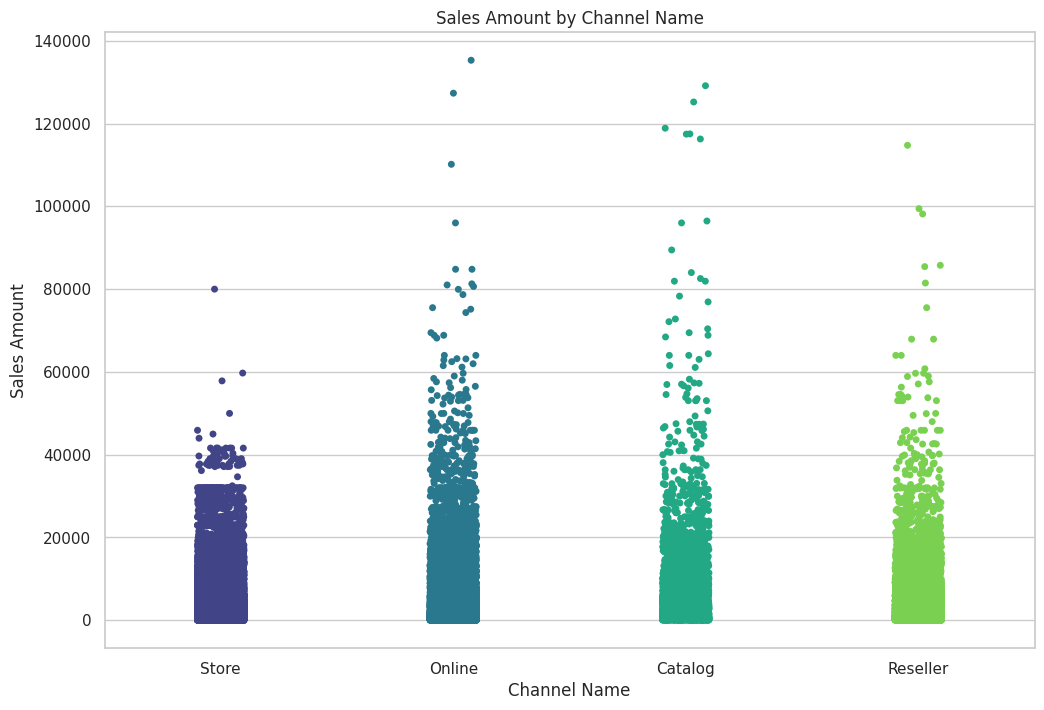

In [561]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(x='ChannelName', y='SalesAmount', data=df_new_sales_channel, jitter=True, palette='viridis')

# Set labels and title
plt.xlabel('Channel Name')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Channel Name')

# Show the plot
plt.show()


lets see 1 more plot for seaborn.stripplot function to visualize the relationship between 'ChannelName' and 'TotalCost'

<ipython-input-562-d47860b90aee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='ChannelName', y='TotalCost', data=df_new_sales_channel, jitter=True, palette='viridis')


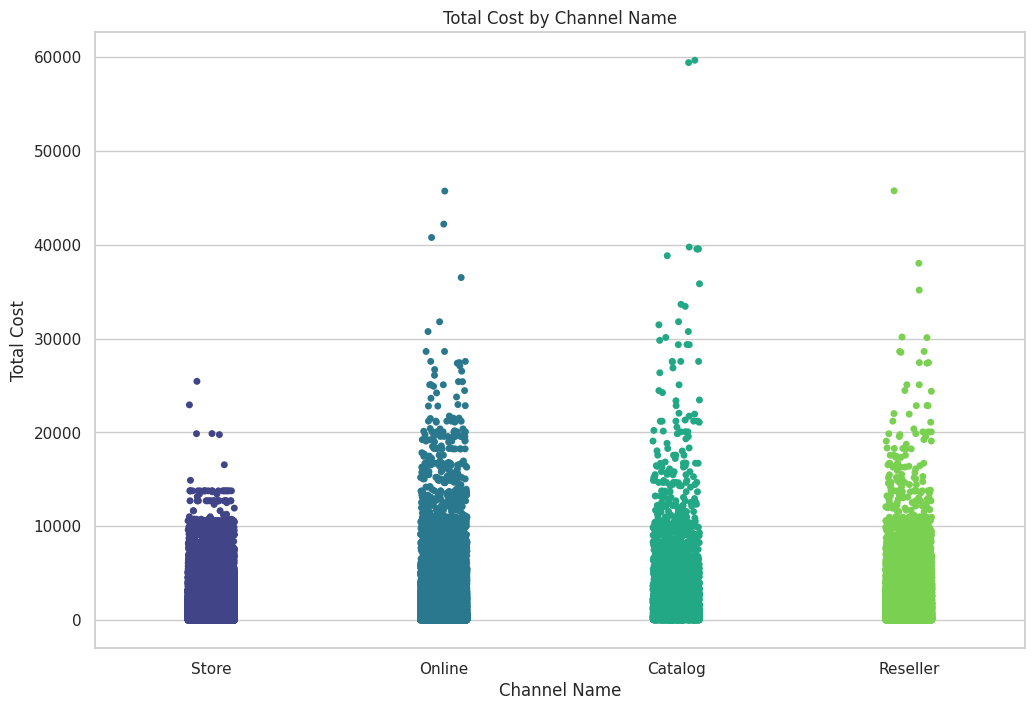

In [562]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(x='ChannelName', y='TotalCost', data=df_new_sales_channel, jitter=True, palette='viridis')

# Set labels and title
plt.xlabel('Channel Name')
plt.ylabel('Total Cost')
plt.title('Total Cost by Channel Name')

# Show the plot
plt.show()

The initial plot highlights a marginal increase in **'Sales Amount'** for **'online,'** while the subsequent plot reveals that **'catalog'** surpasses in **'Total Cost.'** These insights emphasize the importance of informed decision-making by the management. Further analysis and considerations are essential for strategic planning.

# df_FactSales , df_Dim_Promotion
Let's start by examining the individual data sheets, beginning with the key columns. This will help us understand the structure of each dataset before proceeding with the merging process.d the structure of each dataset before proceeding with the merging process.

For df_FactSales then follow by df_Dim_Promotion

In [563]:
# Display basic information about df_FactSales
print(df_FactSales.info())

# Display the first few rows of df_FactSales
print(df_FactSales.keys())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SalesKey          100000 non-null  int64         
 1   DateKey           100000 non-null  datetime64[ns]
 2   channelKey        100000 non-null  int64         
 3   StoreKey          100000 non-null  int64         
 4   ProductKey        100000 non-null  int64         
 5   PromotionKey      100000 non-null  int64         
 6   CurrencyKey       100000 non-null  int64         
 7   UnitCost          100000 non-null  float64       
 8   UnitPrice         100000 non-null  float64       
 9   SalesQuantity     100000 non-null  int64         
 10  ReturnQuantity    100000 non-null  int64         
 11  ReturnAmount      100000 non-null  float64       
 12  DiscountQuantity  100000 non-null  int64         
 13  DiscountAmount    100000 non-null  float64       
 14  Total

In [564]:
# Display basic information about df_FactSales
print(df_Dim_Promotion.info())

# Display the first few rows of df_FactSales
print(df_Dim_Promotion.keys())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PromotionKey          28 non-null     int64         
 1   PromotionLabel        28 non-null     int64         
 2   PromotionName         28 non-null     object        
 3   PromotionDescription  28 non-null     object        
 4   DiscountPercent       28 non-null     float64       
 5   PromotionType         28 non-null     object        
 6   PromotionCategory     28 non-null     object        
 7   StartDate             28 non-null     datetime64[ns]
 8   EndDate               28 non-null     datetime64[ns]
 9   MinQuantity           28 non-null     float64       
 10  MaxQuantity           28 non-null     float64       
 11  ETLLoadID             28 non-null     int64         
 12  LoadDate              28 non-null     datetime64[ns]
 13  UpdateDate            

now To **merge df_FactSales and df_Dim_Promotion** on the** 'PromotionKey'**, specify the how parameter in the merge function

In [565]:
# Assuming df_dim_channel and df_FactSales are your DataFrames
df_new_sales_promo = pd.merge(df_FactSales, df_Dim_Promotion, on='PromotionKey', how='inner')

# Now df_new_sales_channel contains the merged data

df_new_sales_promo.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,...,DiscountPercent,PromotionType,PromotionCategory,StartDate,EndDate,MinQuantity,MaxQuantity,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,1,2007-01-02,1,209,956,10,1,91.05,198.0,8,...,0.2,Seasonal Discount,Store,2007-10-01,2008-01-31,0.0,0.0,1,2009-09-01,2009-09-01
1,4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,...,0.2,Seasonal Discount,Store,2007-10-01,2008-01-31,0.0,0.0,1,2009-09-01,2009-09-01
2,5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,...,0.2,Seasonal Discount,Store,2007-10-01,2008-01-31,0.0,0.0,1,2009-09-01,2009-09-01
3,32,2007-12-27,1,225,346,10,1,303.05,659.0,8,...,0.2,Seasonal Discount,Store,2007-10-01,2008-01-31,0.0,0.0,1,2009-09-01,2009-09-01
4,55,2007-10-04,2,306,1826,10,1,16.31,32.0,2,...,0.2,Seasonal Discount,Store,2007-10-01,2008-01-31,0.0,0.0,1,2009-09-01,2009-09-01


process has been successfully completed, and the resulting DataFrame df_new_sales_promo now contains columns from both df_Dim_Promotion and df_FactSales.

In [566]:
df_new_sales_promo['PromotionKey'].unique()

array([10,  2, 11,  3,  5, 15, 12, 24,  1, 13, 20,  4, 22, 14, 21,  7, 25,
        9, 19,  8, 28, 27, 18, 17,  6, 16, 26, 23])

Now use the seaborn.lineplot function to visualize the relationship between **'PromotionKey' and 'unitPrice'**. This code will create a line plot where each point represents a data point in your DataFrame, and the points are jittered for better visibility. The x-axis represents **'PromotionKey'**, and the y-axis represents **'unitPrice'**.

<ipython-input-567-21aec4d939d1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='PromotionKey', y='UnitPrice', data=df_new_sales_promo, marker='o', ci=None, palette='viridis')
<ipython-input-567-21aec4d939d1>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='PromotionKey', y='UnitPrice', data=df_new_sales_promo, marker='o', ci=None, palette='viridis')


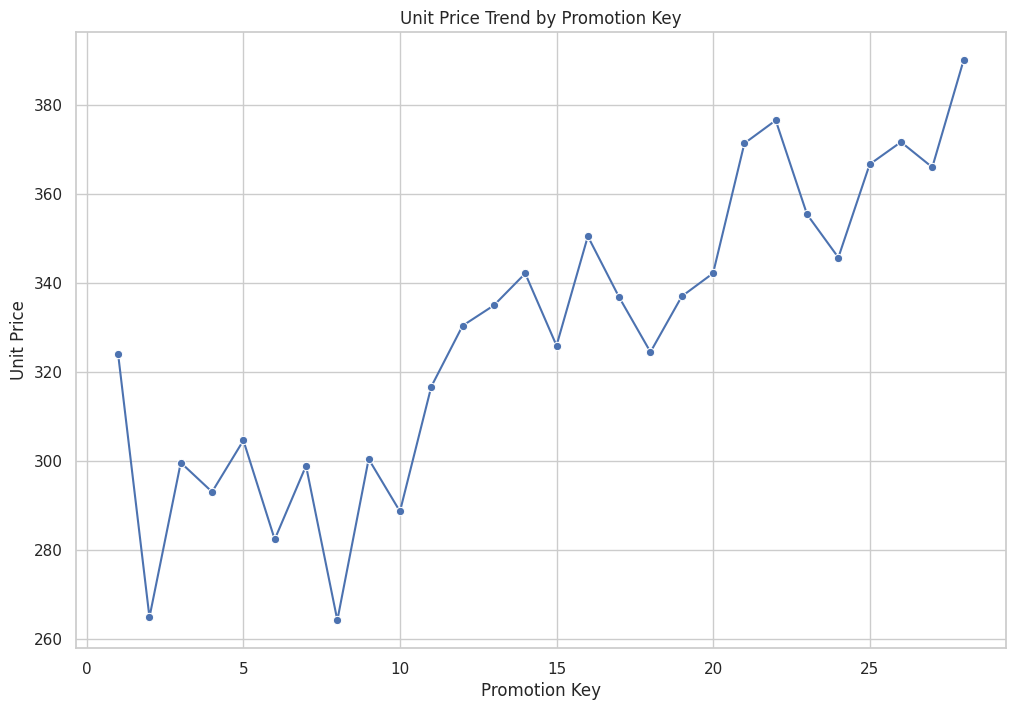

In [567]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='PromotionKey', y='UnitPrice', data=df_new_sales_promo, marker='o', ci=None, palette='viridis')
plt.xlabel('Promotion Key')
plt.ylabel('Unit Price')
plt.title('Unit Price Trend by Promotion Key')
plt.show()


<ipython-input-568-eb293efecf14>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='PromotionKey', y='SalesQuantity', data=df_new_sales_promo, marker='o', ci=None, palette='viridis')
<ipython-input-568-eb293efecf14>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='PromotionKey', y='SalesQuantity', data=df_new_sales_promo, marker='o', ci=None, palette='viridis')


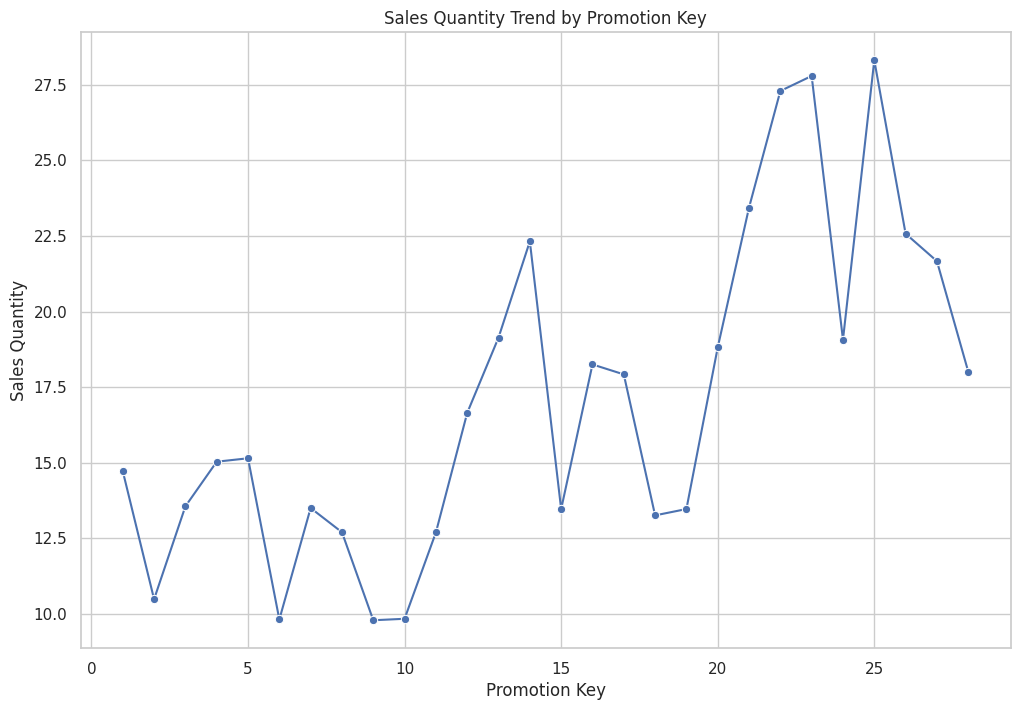

In [568]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='PromotionKey', y='SalesQuantity', data=df_new_sales_promo, marker='o', ci=None, palette='viridis')
plt.xlabel('Promotion Key')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity Trend by Promotion Key')
plt.show()


"The line plot contrasting 'PromotionKey' against 'UnitPrice' suggests a positive upward trend, indicating an increase in unit prices over time. However, the parallel exploration of 'PromotionKey' and 'SalesQuantity' in the second line plot unveils a concerning negative trend in sales quantity. This discrepancy prompts the need for a comprehensive analysis to align sales strategy with the observed trends, fostering a more coherent approach for optimizing outcomes. The management is encouraged to delve deeper into the data to formulate strategies that balance unit price increases with sustained or improved sales quantities, ensuring a harmonized and effective promotional approach."

#df_Dim_Store and df_FactInventory

 Let's merge the datasets **df_Dim_Store and df_FactInventory** using an outer join and name the merged DataFrame as **df_inv_store**. and targeting StoreKey

In [569]:
# Assuming df_Dim_Store and df_FactInventory are your DataFrames
# If not, replace them with your actual DataFrames

# Merge df_Dim_Store and df_FactInventory using an outer join on 'StoreKey'
df_inv_store = pd.merge(df_Dim_Store, df_FactInventory, on='StoreKey', how='outer')

# Display the first few rows of the merged DataFrame
df_inv_store.head()


,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,10,0,3,5.29,34,21,72,1,2010-01-01,2010-01-01
1,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,13,0,3,52.00,44,36,87,1,2010-01-01,2010-01-01
2,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,12,0,6,144.52,42,49,107,1,2010-01-01,2010-01-01
3,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,21,0,12,141.47,36,45,75,1,2010-01-01,2010-01-01
4,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,7,0,3,75.96,119,21,115,1,2010-01-01,2010-01-01


In [570]:
df_inv_store.keys()

Index(['StoreKey', 'GeographyKey', 'StoreManager', 'StoreType', 'StoreName',
       'StoreDescription', 'Status', 'OpenDate', 'CloseDate', 'EntityKey',
       'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1',
       'AddressLine2', 'CloseReason', 'EmployeeCount', 'SellingAreaSize',
       'LastRemodelDate', 'GeoLocation', 'Geometry', 'ETLLoadID_x',
       'LoadDate_x', 'UpdateDate_x', 'InventoryKey', 'DateKey', 'ProductKey',
       'CurrencyKey', 'OnHandQuantity', 'OnOrderQuantity',
       'SafetyStockQuantity', 'UnitCost', 'DaysInStock', 'MinDayInStock',
       'MaxDayInStock', 'ETLLoadID_y', 'LoadDate_y', 'UpdateDate_y'],
      dtype='object')

<ipython-input-571-330646df3884>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='StoreKey', y='StoreType', data=df_inv_store, jitter=True, palette='viridis')


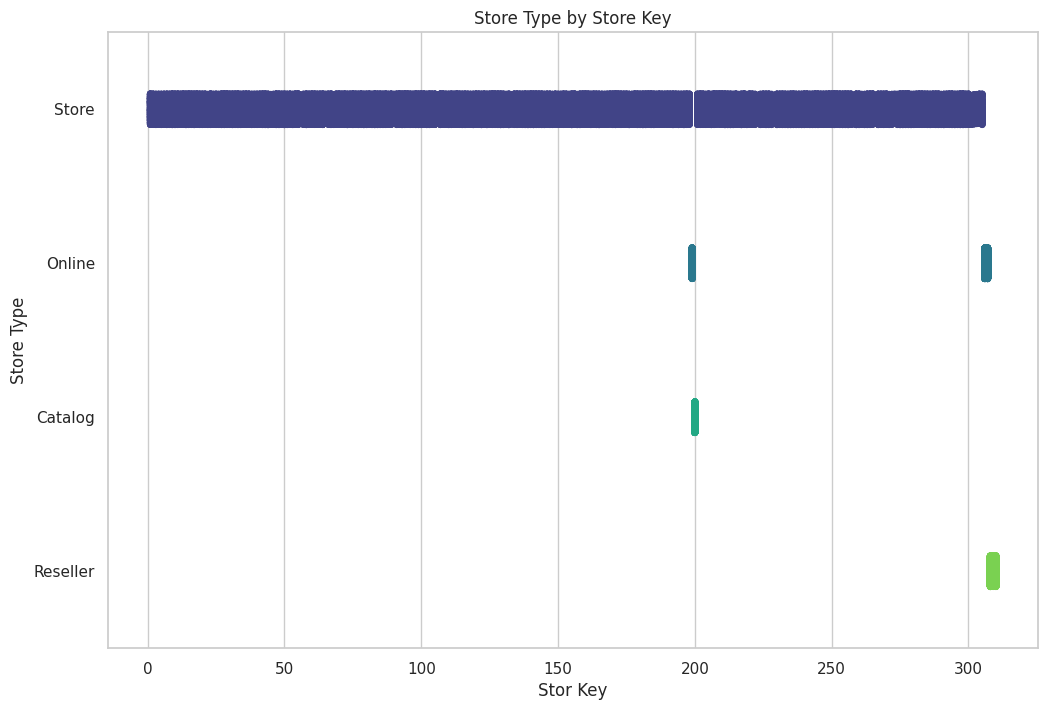

In [571]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(x='StoreKey', y='StoreType', data=df_inv_store, jitter=True, palette='viridis')

# Set labels and title
plt.xlabel('Stor Key')
plt.ylabel('Store Type')
plt.title('Store Type by Store Key')

# Show the plot
plt.show()

<ipython-input-572-05bdd9dc67c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='StoreKey', y='Status', data=df_inv_store, jitter=True, palette='viridis')


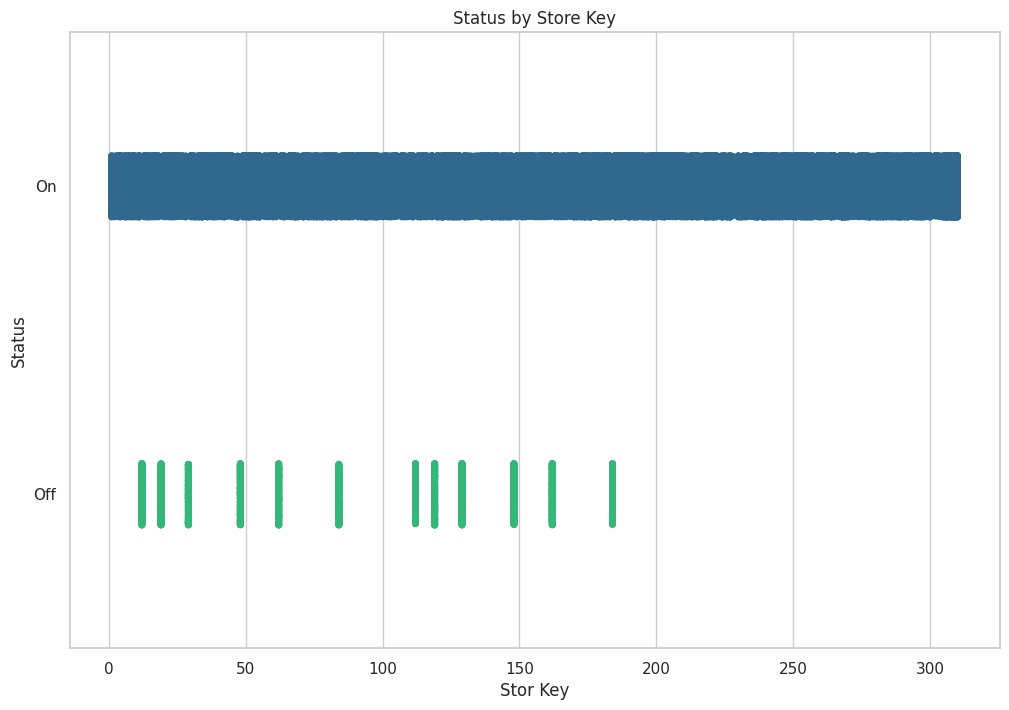

In [572]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a stripplot
plt.figure(figsize=(12, 8))
sns.stripplot(x='StoreKey', y='Status', data=df_inv_store, jitter=True, palette='viridis')

# Set labels and title
plt.xlabel('Stor Key')
plt.ylabel('Status')
plt.title('Status by Store Key')

# Show the plot
plt.show()

#df_Dim_ProductCategory and df_Dim_Product_Subcategory


Let's merge the datasets **df_Dim_ProductCategory and df_Dim_Product_Subcategory** using an outer join and name the merged DataFrame as **df_new_product** and targeting StoreKey

In [573]:
# Merge df_Dim_Store and df_FactInventory using an outer join on 'StoreKey'
df_new_product = pd.merge(df_Dim_ProductCategory, df_Dim_Product_Subcategory, on='ProductCategoryKey', how='outer')

# Display the first few rows of the merged DataFrame
df_new_product.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,ProductSubcategoryDescription,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,MP4&MP3,1,2009-07-07,2009-07-07
1,1,1,Audio,Audio,1,2009-07-07,2009-07-07,2,102,Recorder,Recorder,1,2009-07-07,2009-07-07
2,1,1,Audio,Audio,1,2009-07-07,2009-07-07,3,103,Radio,Radio,1,2009-07-07,2009-07-07
3,1,1,Audio,Audio,1,2009-07-07,2009-07-07,4,104,Recording Pen,Recording Pen,1,2009-07-07,2009-07-07
4,1,1,Audio,Audio,1,2009-07-07,2009-07-07,5,105,Headphones,Headphones,1,2009-07-07,2009-07-07


In [574]:
df_new_product.keys()

Index(['ProductCategoryKey', 'ProductCategoryLabel', 'ProductCategoryName',
       'ProductCategoryDescription', 'ETLLoadID_x', 'LoadDate_x',
       'UpdateDate_x', 'ProductSubcategoryKey', 'ProductSubcategoryLabel',
       'ProductSubcategoryName', 'ProductSubcategoryDescription',
       'ETLLoadID_y', 'LoadDate_y', 'UpdateDate_y'],
      dtype='object')

<ipython-input-575-cf89afcf30d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='ProductCategoryKey', y='ProductCategoryName', data=df_new_product, marker='o', ci=None, palette='viridis')
<ipython-input-575-cf89afcf30d0>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='ProductCategoryKey', y='ProductCategoryName', data=df_new_product, marker='o', ci=None, palette='viridis')


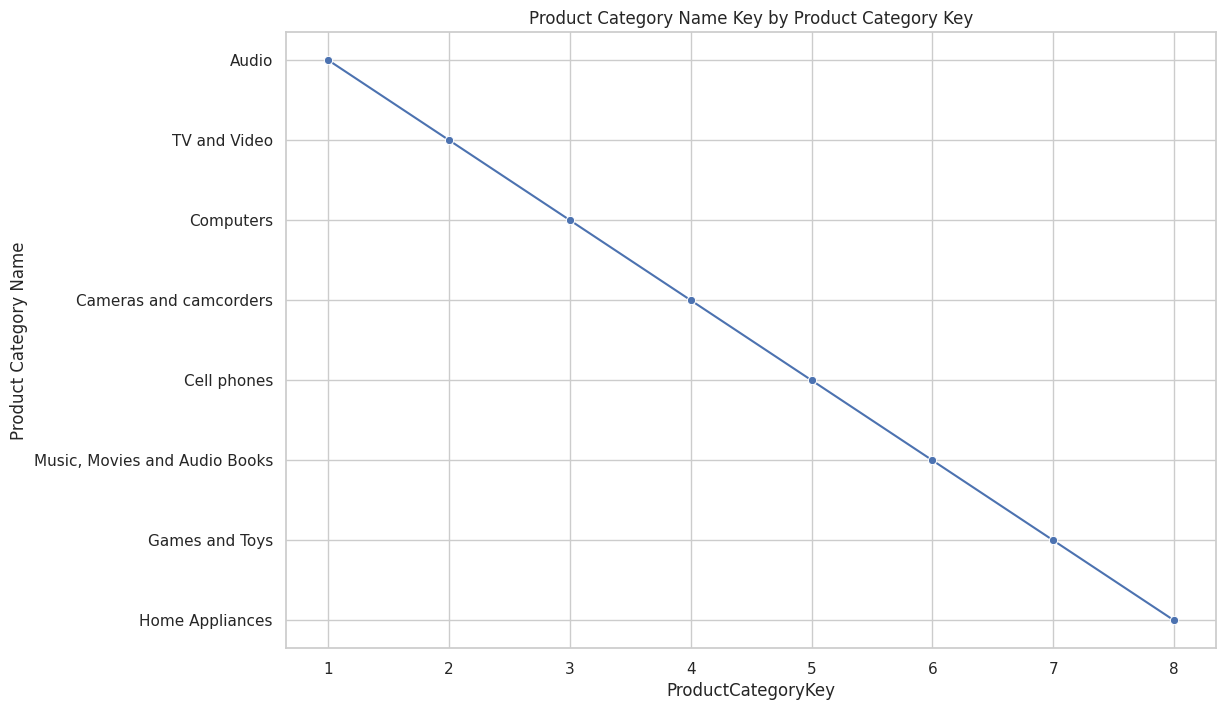

In [575]:
# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='ProductCategoryKey', y='ProductCategoryName', data=df_new_product, marker='o', ci=None, palette='viridis')

# Set labels and title
plt.xlabel('ProductCategoryKey')
plt.ylabel('Product Category Name')
plt.title('Product Category Name Key by Product Category Key')

# Show the plot
plt.show()

<ipython-input-576-91330e9369ce>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='ProductCategoryKey', y='ProductSubcategoryName', data=df_new_product, marker='o', ci=None, palette='viridis')
<ipython-input-576-91330e9369ce>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='ProductCategoryKey', y='ProductSubcategoryName', data=df_new_product, marker='o', ci=None, palette='viridis')


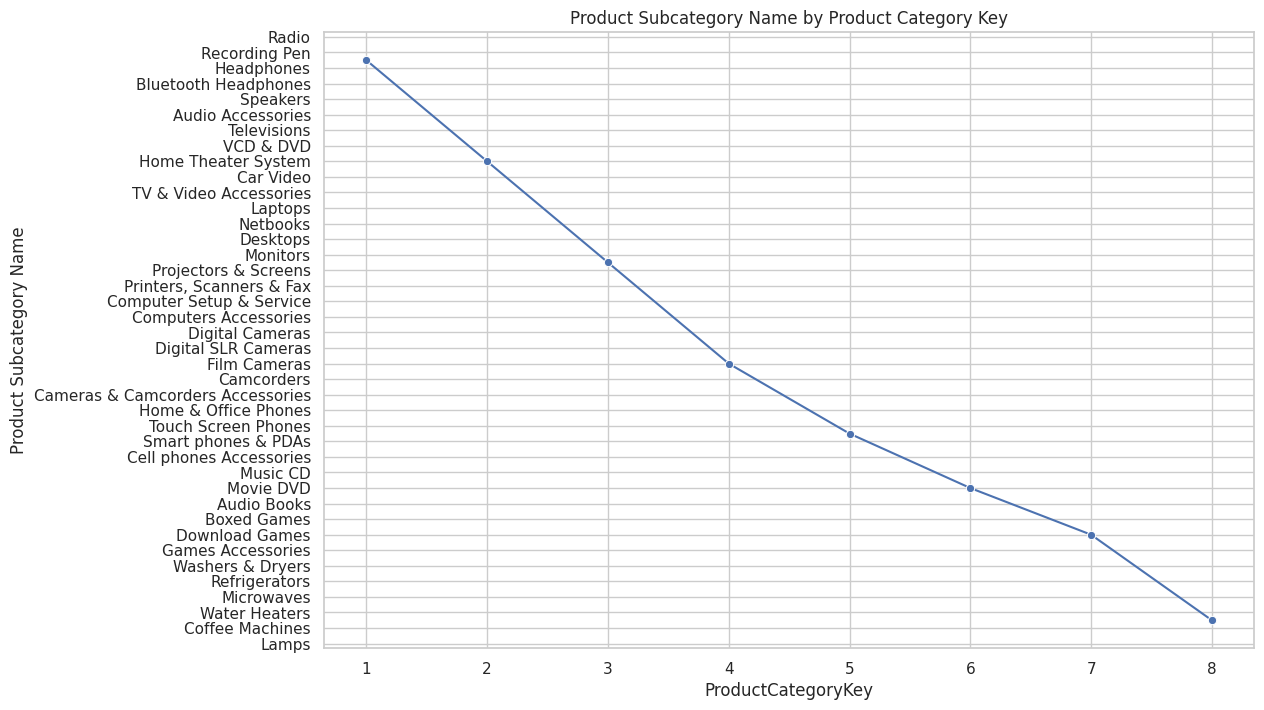

In [576]:
# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='ProductCategoryKey', y='ProductSubcategoryName', data=df_new_product, marker='o', ci=None, palette='viridis')

# Set labels and title
plt.xlabel('ProductCategoryKey')
plt.ylabel('Product Subcategory Name')
plt.title('Product Subcategory Name by Product Category Key')

# Show the plot
plt.show()

#df_new_product , df_Dim_Product

Now merge **df_new_product** with **df_Dim_Product** on the **ProductSubcategoryKey** name it as  **df_new_product_2**

In [577]:
# Merge df_Dim_Store and df_FactInventory using an outer join on 'StoreKey'
df_new_product_2 = pd.merge(df_new_product,df_Dim_Product, on='ProductSubcategoryKey', how='outer')

# Display the first few rows of the merged DataFrame
df_new_product_2.head()


,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,7.4,14.52,2006-05-13,0.0,On,0.0,0.0,1.0,2008-05-27 08:01:12,2008-05-27 08:01:12
1,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-16,0.0,On,0.0,0.0,1.0,2008-05-28 08:01:12,2008-05-28 08:01:12
2,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-17,0.0,On,0.0,0.0,1.0,2008-05-29 08:01:12,2008-05-29 08:01:12
3,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-18,0.0,On,0.0,0.0,1.0,2008-05-30 08:01:12,2008-05-30 08:01:12
4,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-19,0.0,On,0.0,0.0,1.0,2008-05-31 08:01:12,2008-05-31 08:01:12


In [578]:
df_new_product_2.keys()

Index(['ProductCategoryKey', 'ProductCategoryLabel', 'ProductCategoryName',
       'ProductCategoryDescription', 'ETLLoadID_x', 'LoadDate_x',
       'UpdateDate_x', 'ProductSubcategoryKey', 'ProductSubcategoryLabel',
       'ProductSubcategoryName', 'ProductSubcategoryDescription',
       'ETLLoadID_y', 'LoadDate_y', 'UpdateDate_y', 'ProductKey',
       'ProductLabel', 'ProductName', 'ProductDescription', 'Manufacturer',
       'BrandName', 'ClassID', 'ClassName', 'StyleID', 'StyleName', 'ColorID',
       'ColorName', 'Size', 'SizeRange', 'SizeUnitMeasureID', 'Weight',
       'WeightUnitMeasureID', 'UnitOfMeasureID', 'UnitOfMeasureName',
       'StockTypeID', 'StockTypeName', 'UnitCost', 'UnitPrice',
       'AvailableForSaleDate', 'StopSaleDate', 'Status', 'ImageURL',
       'ProductURL', 'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

<ipython-input-579-aa204ce30273>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ProductSubcategoryKey', y='UnitPrice', data=df_new_product_2, palette='viridis')


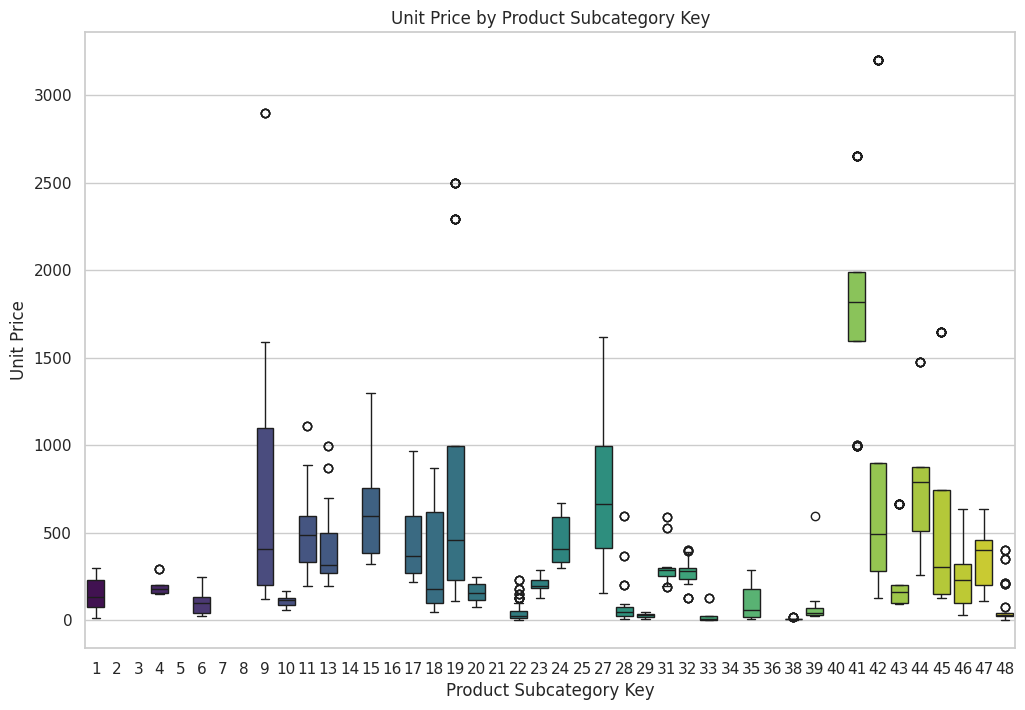

In [579]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='ProductSubcategoryKey', y='UnitPrice', data=df_new_product_2, palette='viridis')

# Set labels and title
plt.xlabel('Product Subcategory Key')
plt.ylabel('Unit Price')
plt.title('Unit Price by Product Subcategory Key')

# Show the plot
plt.show()


<ipython-input-580-e19d302cf039>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ProductSubcategoryKey', y='UnitCost', data=df_new_product_2, palette='viridis')


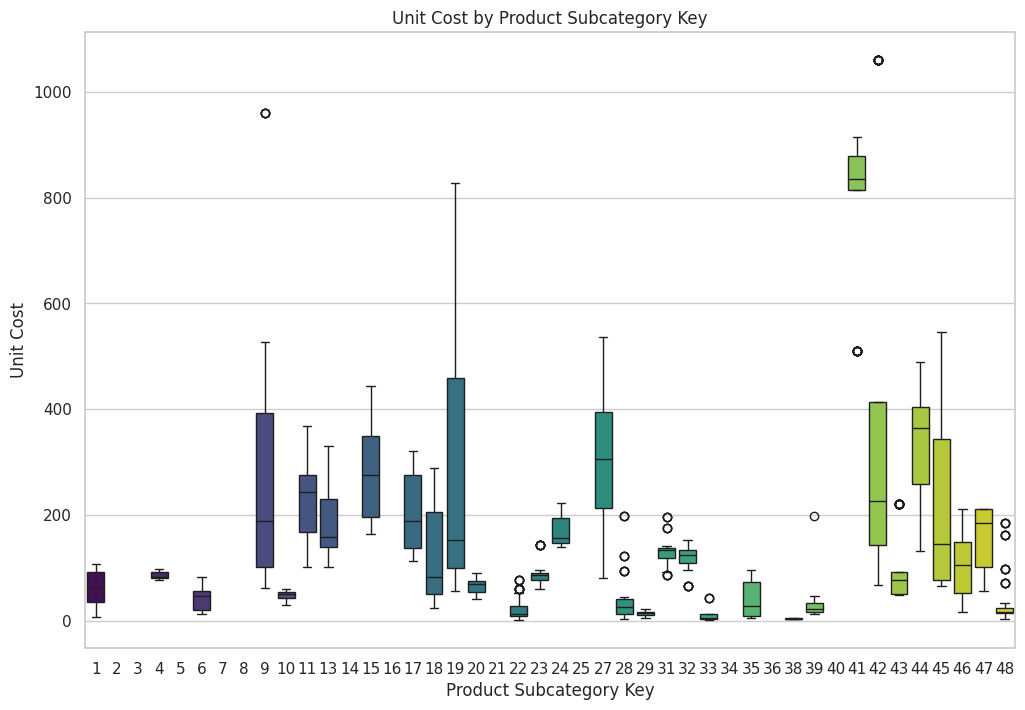

In [580]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='ProductSubcategoryKey', y='UnitCost', data=df_new_product_2, palette='viridis')

# Set labels and title
plt.xlabel('Product Subcategory Key')
plt.ylabel('Unit Cost')
plt.title('Unit Cost by Product Subcategory Key')

# Show the plot
plt.show()

#df_inv_store  df_new_product_2

merge the df_inv_store and df_new_product_2 DataFrames using an outer join on then call the resulting DataFrame final_inventory.

In [581]:
# Merge df_inv_store and df_new_product_2 using an outer join
final_inventory = pd.merge(df_inv_store, df_new_product_2, how='outer')

# Display the first few rows of the merged DataFrame
final_inventory.head()




,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
1,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
2,25.0,839.0,57.0,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16,Unknown,659.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
3,107.0,926.0,123.0,Store,Contoso Sebring Store,Contoso Sebring Store,On,2003-02-12,Unknown,741.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
4,167.0,796.0,182.0,Store,Contoso Bar Harbor Store,Contoso Bar Harbor Store,On,2004-02-18,Unknown,801.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT


In [582]:
final_inventory.keys()

Index(['StoreKey', 'GeographyKey', 'StoreManager', 'StoreType', 'StoreName',
       'StoreDescription', 'Status', 'OpenDate', 'CloseDate', 'EntityKey',
       'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1',
       'AddressLine2', 'CloseReason', 'EmployeeCount', 'SellingAreaSize',
       'LastRemodelDate', 'GeoLocation', 'Geometry', 'ETLLoadID_x',
       'LoadDate_x', 'UpdateDate_x', 'InventoryKey', 'DateKey', 'ProductKey',
       'CurrencyKey', 'OnHandQuantity', 'OnOrderQuantity',
       'SafetyStockQuantity', 'UnitCost', 'DaysInStock', 'MinDayInStock',
       'MaxDayInStock', 'ETLLoadID_y', 'LoadDate_y', 'UpdateDate_y',
       'ProductCategoryKey', 'ProductCategoryLabel', 'ProductCategoryName',
       'ProductCategoryDescription', 'ProductSubcategoryKey',
       'ProductSubcategoryLabel', 'ProductSubcategoryName',
       'ProductSubcategoryDescription', 'ProductLabel', 'ProductName',
       'ProductDescription', 'Manufacturer', 'BrandName', 'ClassID',
       '

<ipython-input-583-3dd13c8eaef9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BrandName', y='AvailableForSaleDate', data=final_inventory, palette='viridis')


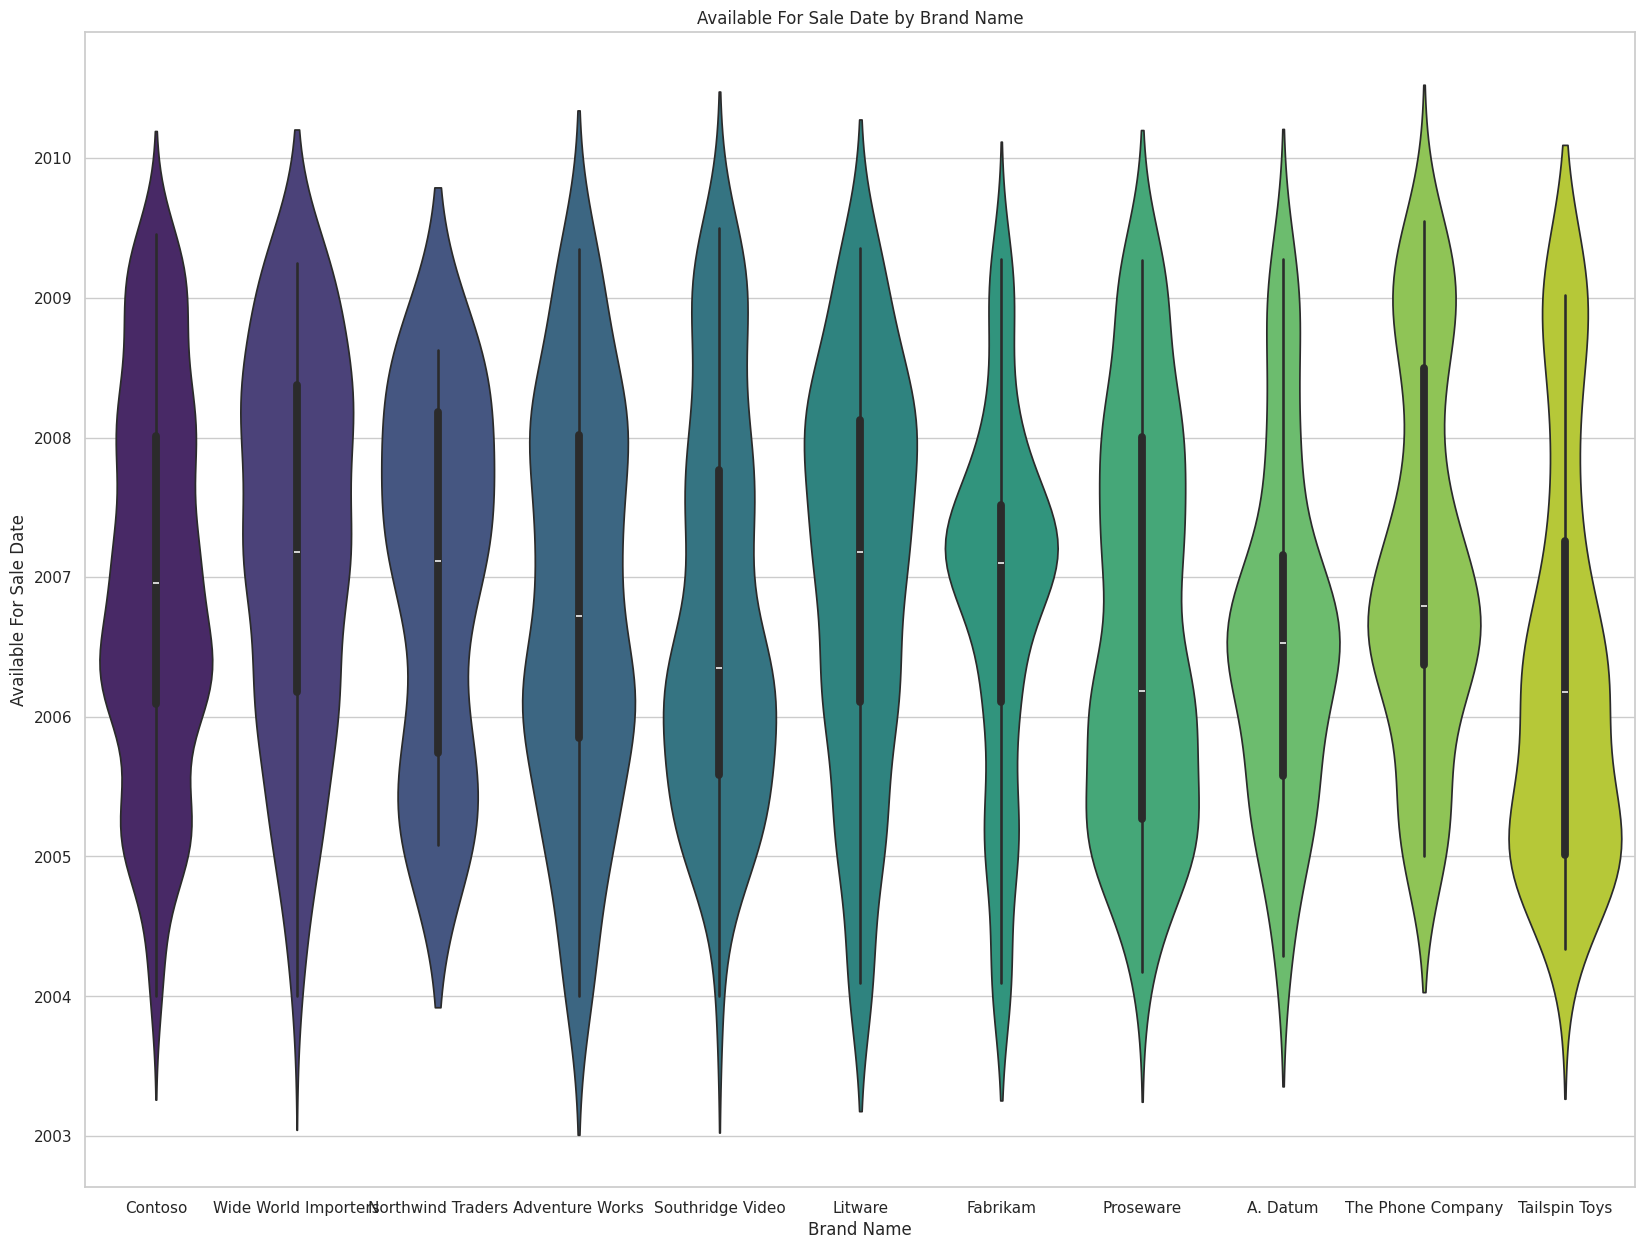

In [583]:
# Create a violin plot
plt.figure(figsize=(20, 15))
sns.violinplot(x='BrandName', y='AvailableForSaleDate', data=final_inventory, palette='viridis')

# Set labels and title
plt.xlabel('Brand Name')
plt.ylabel('Available For Sale Date')
plt.title('Available For Sale Date by Brand Name')

# Show the plot
plt.show()


<ipython-input-584-0b72adab9539>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BrandName', y='StockTypeID', data=final_inventory, palette='viridis')


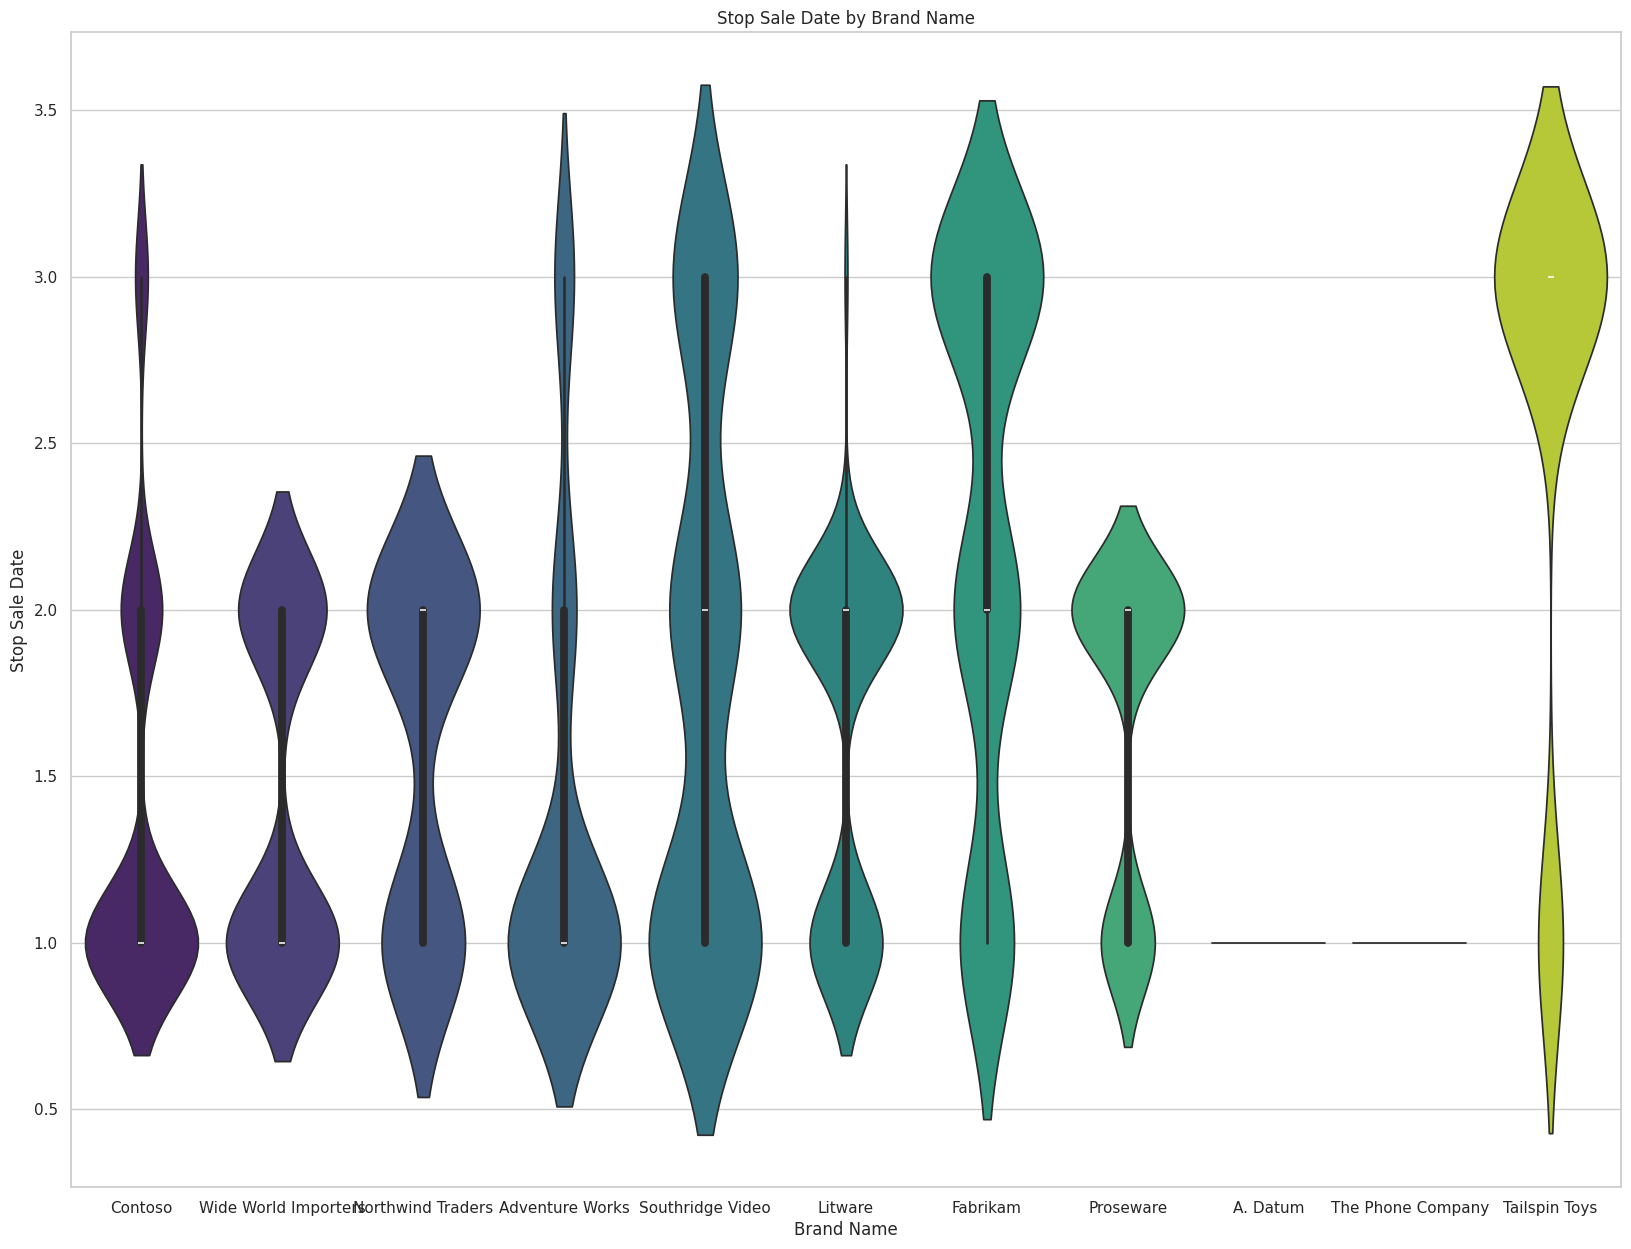

In [584]:
# Create a violin plot
plt.figure(figsize=(20, 15))
sns.violinplot(x='BrandName', y='StockTypeID', data=final_inventory, palette='viridis')

# Set labels and title
plt.xlabel('Brand Name')
plt.ylabel('Stop Sale Date')
plt.title('Stop Sale Date by Brand Name')

# Show the plot
plt.show()

#df_Dim_Geography , final_inventory

merge df_Dim_Geography with final_inventory using the 'GeographyKey' This code will perform the merge using 'GeographyKey' as the key column.

In [585]:
# Merge df_Dim_Geography and final_inventory using an outer join on 'GeographyKey'
final_inventory2 = pd.merge(df_Dim_Geography, final_inventory, on='GeographyKey', how='outer')

# Display the first few rows of the merged DataFrame
final_inventory2.head()



<ipython-input-585-ed43500c327d>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'LoadDate_y', 'ETLLoadID_y', 'UpdateDate_y'} in the result is deprecated and will raise a MergeError in a future version.
  final_inventory2 = pd.merge(df_Dim_Geography, final_inventory, on='GeographyKey', how='outer')


,GeographyKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,Geometry_x,ETLLoadID_x,LoadDate_x,UpdateDate_x,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
1,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
2,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
3,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
4,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT


In [586]:
final_inventory2.keys()

Index(['GeographyKey', 'GeographyType', 'ContinentName', 'CityName',
       'StateProvinceName', 'RegionCountryName', 'Geometry_x', 'ETLLoadID_x',
       'LoadDate_x', 'UpdateDate_x', 'StoreKey', 'StoreManager', 'StoreType',
       'StoreName', 'StoreDescription', 'Status', 'OpenDate', 'CloseDate',
       'EntityKey', 'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax',
       'AddressLine1', 'AddressLine2', 'CloseReason', 'EmployeeCount',
       'SellingAreaSize', 'LastRemodelDate', 'GeoLocation', 'Geometry_y',
       'ETLLoadID_x', 'LoadDate_x', 'UpdateDate_x', 'InventoryKey', 'DateKey',
       'ProductKey', 'CurrencyKey', 'OnHandQuantity', 'OnOrderQuantity',
       'SafetyStockQuantity', 'UnitCost', 'DaysInStock', 'MinDayInStock',
       'MaxDayInStock', 'ETLLoadID_y', 'LoadDate_y', 'UpdateDate_y',
       'ProductCategoryKey', 'ProductCategoryLabel', 'ProductCategoryName',
       'ProductCategoryDescription', 'ProductSubcategoryKey',
       'ProductSubcategoryLabel', 'ProductSub

<ipython-input-587-3bd275b854ae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='GeographyKey', y='GeographyType', data=final_inventory2, jitter=True, palette='viridis')


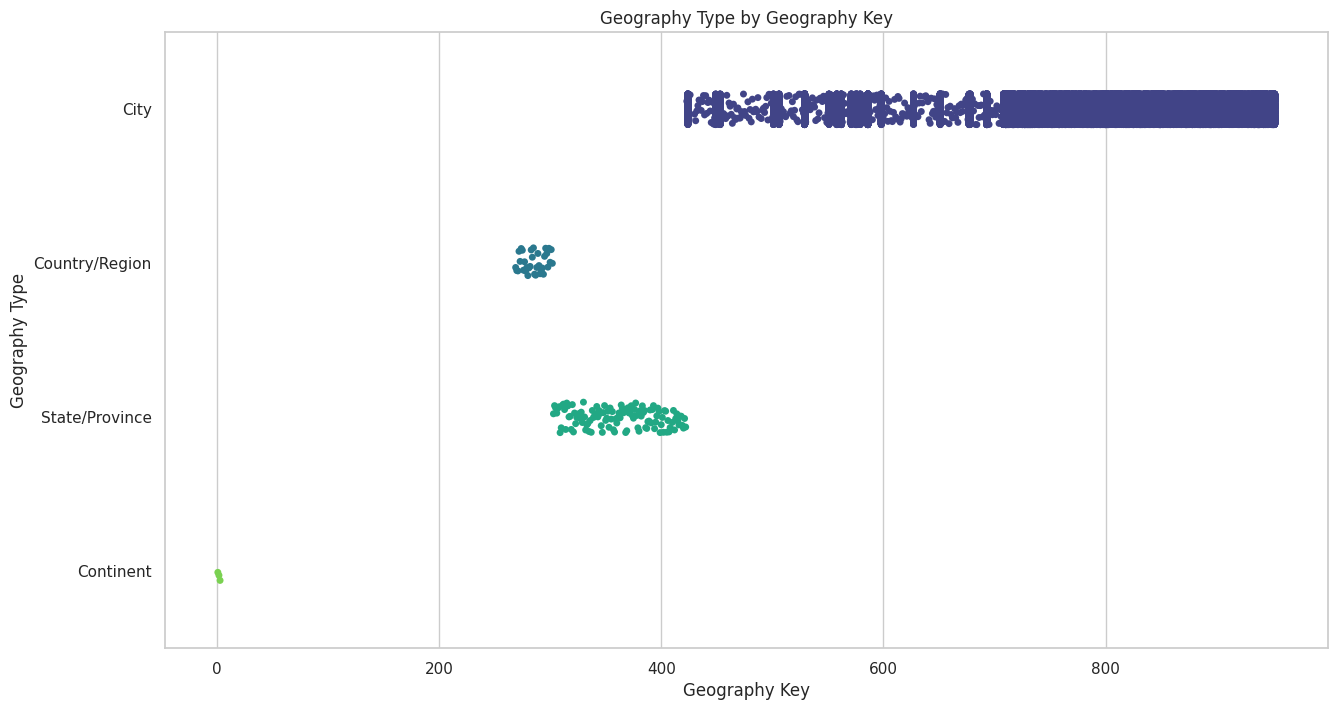

In [587]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a stripplot
plt.figure(figsize=(15, 8))
sns.stripplot(x='GeographyKey', y='GeographyType', data=final_inventory2, jitter=True, palette='viridis')

# Set labels and title
plt.xlabel('Geography Key')
plt.ylabel('Geography Type')
plt.title('Geography Type by Geography Key')

# Show the plot
plt.show()


<ipython-input-588-eb4d0abdf2f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GeographyKey', y='StoreType', data=final_inventory2, palette='viridis')


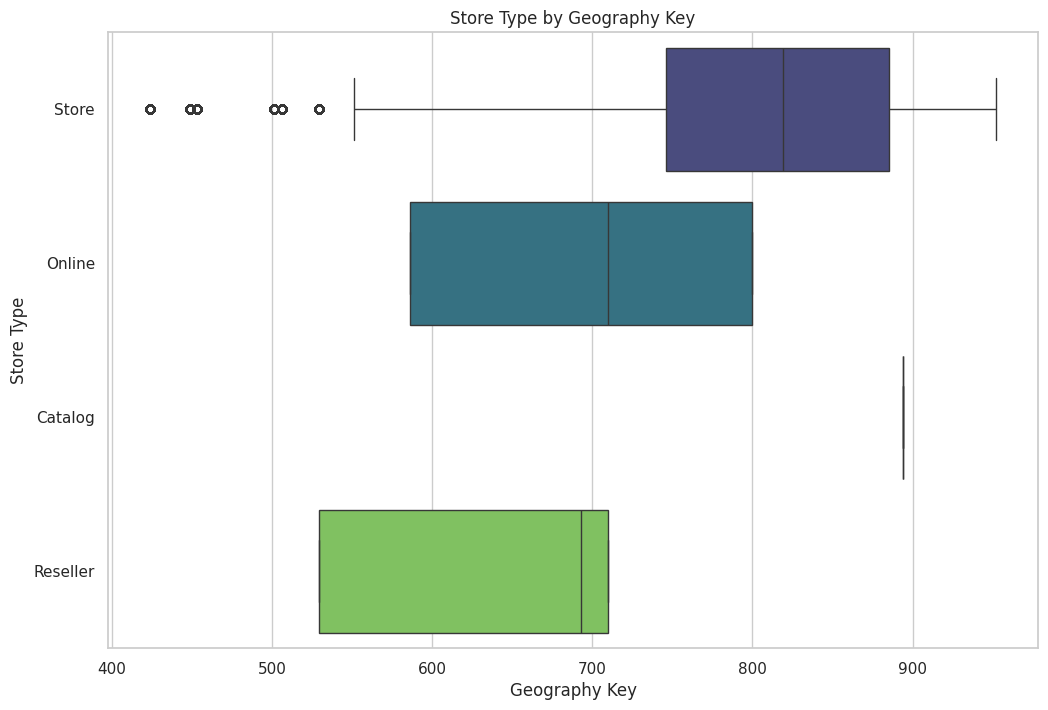

In [588]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='GeographyKey', y='StoreType', data=final_inventory2, palette='viridis')

# Set labels and title
plt.xlabel('Geography Key')
plt.ylabel('Store Type')
plt.title('Store Type by Geography Key')

# Show the plot
plt.show()


**data preprocessing over (23/01/2024)**

**from here starts addressing missing values (23/01/2024)**

handle missing value/data for:

* df_new_sales_channel
* df_new_sales_promo
* df_inv_store
* df_new_product
* df_new_product_2
* final_inventory
* final_inventory2




In [589]:
#no.1
df_new_sales_channel.isnull().sum()

channelKey            0
ChannelLabel          0
ChannelName           0
ChannelDescription    0
ETLLoadID_x           0
LoadDate_x            0
UpdateDate_x          0
SalesKey              0
DateKey               0
StoreKey              0
ProductKey            0
PromotionKey          0
CurrencyKey           0
UnitCost              0
UnitPrice             0
SalesQuantity         0
ReturnQuantity        0
ReturnAmount          0
DiscountQuantity      0
DiscountAmount        0
TotalCost             0
SalesAmount           0
ETLLoadID_y           0
LoadDate_y            0
UpdateDate_y          0
dtype: int64

In [590]:
#no.2
df_new_sales_promo.isnull().sum()

SalesKey                0
DateKey                 0
channelKey              0
StoreKey                0
ProductKey              0
PromotionKey            0
CurrencyKey             0
UnitCost                0
UnitPrice               0
SalesQuantity           0
ReturnQuantity          0
ReturnAmount            0
DiscountQuantity        0
DiscountAmount          0
TotalCost               0
SalesAmount             0
ETLLoadID_x             0
LoadDate_x              0
UpdateDate_x            0
PromotionLabel          0
PromotionName           0
PromotionDescription    0
DiscountPercent         0
PromotionType           0
PromotionCategory       0
StartDate               0
EndDate                 0
MinQuantity             0
MaxQuantity             0
ETLLoadID_y             0
LoadDate_y              0
UpdateDate_y            0
dtype: int64

In [591]:
#no.3
df_inv_store.isnull().sum()

StoreKey               0
GeographyKey           0
StoreManager           0
StoreType              0
StoreName              0
StoreDescription       0
Status                 0
OpenDate               0
CloseDate              0
EntityKey              0
ZipCode                0
ZipCodeExtension       0
StorePhone             0
StoreFax               0
AddressLine1           0
AddressLine2           0
CloseReason            0
EmployeeCount          0
SellingAreaSize        0
LastRemodelDate        0
GeoLocation            0
Geometry               0
ETLLoadID_x            0
LoadDate_x             0
UpdateDate_x           0
InventoryKey           0
DateKey                0
ProductKey             0
CurrencyKey            0
OnHandQuantity         0
OnOrderQuantity        0
SafetyStockQuantity    0
UnitCost               0
DaysInStock            0
MinDayInStock          0
MaxDayInStock          0
ETLLoadID_y            0
LoadDate_y             0
UpdateDate_y           0
dtype: int64

In [592]:
#no.4
df_new_product.isnull().sum()

ProductCategoryKey               0
ProductCategoryLabel             0
ProductCategoryName              0
ProductCategoryDescription       0
ETLLoadID_x                      0
LoadDate_x                       0
UpdateDate_x                     0
ProductSubcategoryKey            0
ProductSubcategoryLabel          0
ProductSubcategoryName           0
ProductSubcategoryDescription    0
ETLLoadID_y                      0
LoadDate_y                       0
UpdateDate_y                     0
dtype: int64

In [593]:
#no.5
df_new_product_2.isnull().sum()

ProductCategoryKey                0
ProductCategoryLabel              0
ProductCategoryName               0
ProductCategoryDescription        0
ETLLoadID_x                       0
LoadDate_x                        0
UpdateDate_x                      0
ProductSubcategoryKey             0
ProductSubcategoryLabel           0
ProductSubcategoryName            0
ProductSubcategoryDescription     0
ETLLoadID_y                       0
LoadDate_y                        0
UpdateDate_y                      0
ProductKey                       12
ProductLabel                     12
ProductName                      12
ProductDescription               13
Manufacturer                     12
BrandName                        12
ClassID                          12
ClassName                        12
StyleID                          12
StyleName                        12
ColorID                          12
ColorName                        12
Size                             12
SizeRange                   

In [594]:
df_new_product_2.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,7.4,14.52,2006-05-13,0.0,On,0.0,0.0,1.0,2008-05-27 08:01:12,2008-05-27 08:01:12
1,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-16,0.0,On,0.0,0.0,1.0,2008-05-28 08:01:12,2008-05-28 08:01:12
2,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-17,0.0,On,0.0,0.0,1.0,2008-05-29 08:01:12,2008-05-29 08:01:12
3,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-18,0.0,On,0.0,0.0,1.0,2008-05-30 08:01:12,2008-05-30 08:01:12
4,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-19,0.0,On,0.0,0.0,1.0,2008-05-31 08:01:12,2008-05-31 08:01:12


it seen the there a miising value lets see farther to check it

In [595]:
# Specify the columns you want to check for missing values
columns_to_check = ['ProductCategoryKey', 'ProductCategoryLabel', 'ProductCategoryName', 'ProductCategoryDescription',
                     'ETLLoadID_x', 'LoadDate_x', 'UpdateDate_x', 'ProductSubcategoryKey', 'ProductSubcategoryLabel',
                     'ProductSubcategoryName', 'UnitCost', 'UnitPrice', 'AvailableForSaleDate', 'StopSaleDate', 'Status',
                     'ImageURL', 'ProductURL', 'ETLLoadID', 'LoadDate', 'UpdateDate']

# Check for missing values in the specified columns
missing_values_indication = df_new_product_2[columns_to_check].isnull().sum()

# Display the indication of missing values
print(missing_values_indication)


ProductCategoryKey             0
ProductCategoryLabel           0
ProductCategoryName            0
ProductCategoryDescription     0
ETLLoadID_x                    0
LoadDate_x                     0
UpdateDate_x                   0
ProductSubcategoryKey          0
ProductSubcategoryLabel        0
ProductSubcategoryName         0
UnitCost                      12
UnitPrice                     12
AvailableForSaleDate          13
StopSaleDate                  12
Status                        12
ImageURL                      12
ProductURL                    12
ETLLoadID                     12
LoadDate                      12
UpdateDate                    12
dtype: int64


It seems like the columns 'UnitCost', 'UnitPrice', 'AvailableForSaleDate', 'StopSaleDate', 'Status', 'ImageURL', 'ProductURL', 'ETLLoadID', 'LoadDate', 'UpdateDate' have some missing values in  DataFrame.


Let's handle the missing values in the specified columns. Here are some common strategies:

* For numerical columns ('UnitCost', 'UnitPrice'):

We can fill missing values with the mean or median of the column.

* For datetime columns ('AvailableForSaleDate', 'StopSaleDate', 'LoadDate', 'UpdateDate'):

We can fill missing values with a specific date or use a strategy based on the data distribution.

* For categorical columns ('Status'):

We can fill missing values with the most frequent category.

* For URL columns ('ImageURL', 'ProductURL'):

We can fill missing values with a placeholder or remove the corresponding rows.

Let's apply these strategies:

In [596]:
# Impute missing values for numerical columns with mean
numerical_columns = ['ProductKey', 'ProductLabel', 'ClassID', 'StyleID', 'ColorID', 'SizeRange',
                     'SizeUnitMeasureID', 'Weight', 'UnitOfMeasureID', 'StockTypeID', 'StopSaleDate', 'ETLLoadID']
df_new_product_2[numerical_columns] = df_new_product_2[numerical_columns].fillna(df_new_product_2[numerical_columns].mean())

# Impute missing values for categorical columns with the most frequent value
categorical_columns = ['ProductName', 'ProductDescription', 'Manufacturer', 'BrandName', 'ClassName', 'StyleName',
                        'ColorName', 'Size', 'WeightUnitMeasureID', 'UnitOfMeasureName', 'StockTypeName']
df_new_product_2[categorical_columns] = df_new_product_2[categorical_columns].fillna(df_new_product_2[categorical_columns].mode().iloc[0])

df_new_product_2[['UnitCost', 'UnitPrice']] = df_new_product_2[['UnitCost', 'UnitPrice']].fillna(0)


# Verify if there are still missing values
print(df_new_product_2.isnull().sum())


ProductCategoryKey                0
ProductCategoryLabel              0
ProductCategoryName               0
ProductCategoryDescription        0
ETLLoadID_x                       0
LoadDate_x                        0
UpdateDate_x                      0
ProductSubcategoryKey             0
ProductSubcategoryLabel           0
ProductSubcategoryName            0
ProductSubcategoryDescription     0
ETLLoadID_y                       0
LoadDate_y                        0
UpdateDate_y                      0
ProductKey                        0
ProductLabel                      0
ProductName                       0
ProductDescription                0
Manufacturer                      0
BrandName                         0
ClassID                           0
ClassName                         0
StyleID                           0
StyleName                         0
ColorID                           0
ColorName                         0
Size                              0
SizeRange                   

looks like have successfully handled missing values for the columns 'UnitCost', 'UnitPrice', 'AvailableForSaleDate', 'StopSaleDate', 'Status', 'ImageURL', 'ProductURL', and 'ETLLoadID'. The remaining columns with missing values include 'ProductKey', 'ProductLabel', 'ProductName', 'ProductDescription', 'Manufacturer', 'BrandName', 'ClassID', 'ClassName', 'StyleID', 'StyleName', 'ColorID', 'ColorName', 'Size', 'SizeRange', 'SizeUnitMeasureID', 'Weight', 'WeightUnitMeasureID', 'UnitOfMeasureID', 'UnitOfMeasureName', 'StockTypeID', 'StockTypeName', and 'ETLLoadID'.

For these remaining columns, can further examine the nature of missing values and apply specific strategies based on the data . may need more information about the dataset and the context to decide the best approach for handling these specific columns.

In [597]:
#no.6
final_inventory.isnull().sum()

StoreKey          2529
GeographyKey      2529
StoreManager      2529
StoreType         2529
StoreName         2529
                 ...  
ImageURL        100012
ProductURL      100012
ETLLoadID       100012
LoadDate        100012
UpdateDate      100012
Length: 75, dtype: int64

In [598]:
final_inventory.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
1,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
2,25.0,839.0,57.0,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16,Unknown,659.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
3,107.0,926.0,123.0,Store,Contoso Sebring Store,Contoso Sebring Store,On,2003-02-12,Unknown,741.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
4,167.0,796.0,182.0,Store,Contoso Bar Harbor Store,Contoso Bar Harbor Store,On,2004-02-18,Unknown,801.0,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT


It looks like the final_inventory DataFrame contains NaN (Not a Number) values in various columns, possibly due to the merging process and the presence of missing values in the original datasets.

In [599]:
final_inventory = final_inventory.fillna(0)

final_inventory.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Unknown,649.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
1,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Unknown,649.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
2,25.0,839.0,57.0,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16 00:00:00,Unknown,659.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
3,107.0,926.0,123.0,Store,Contoso Sebring Store,Contoso Sebring Store,On,2003-02-12 00:00:00,Unknown,741.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
4,167.0,796.0,182.0,Store,Contoso Bar Harbor Store,Contoso Bar Harbor Store,On,2004-02-18 00:00:00,Unknown,801.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0


In [600]:
final_inventory.isnull().sum()

StoreKey        0
GeographyKey    0
StoreManager    0
StoreType       0
StoreName       0
               ..
ImageURL        0
ProductURL      0
ETLLoadID       0
LoadDate        0
UpdateDate      0
Length: 75, dtype: int64

looks like have successfully handled NaN value\

In [601]:
#no.7
final_inventory2.isnull().sum()

GeographyKey           2529
GeographyType          2529
ContinentName          2529
CityName               2529
StateProvinceName      2529
                      ...  
ImageURL             100423
ProductURL           100423
ETLLoadID_y          100423
LoadDate_y           100423
UpdateDate_y         100423
Length: 84, dtype: int64

In [602]:
final_inventory2.head()

,GeographyKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,Geometry_x,ETLLoadID_x,LoadDate_x,UpdateDate_x,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
1,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
2,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
3,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT
4,782.0,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1.0,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaT


same goes to final_inventory2 that having Nan value

In [603]:
final_inventory2.isnull().sum()

GeographyKey           2529
GeographyType          2529
ContinentName          2529
CityName               2529
StateProvinceName      2529
                      ...  
ImageURL             100423
ProductURL           100423
ETLLoadID_y          100423
LoadDate_y           100423
UpdateDate_y         100423
Length: 84, dtype: int64

In [604]:
final_inventory2 = final_inventory.fillna(0)

final_inventory2.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Unknown,649.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
1,15.0,678.0,48.0,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Unknown,649.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
2,25.0,839.0,57.0,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16 00:00:00,Unknown,659.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
3,107.0,926.0,123.0,Store,Contoso Sebring Store,Contoso Sebring Store,On,2003-02-12 00:00:00,Unknown,741.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0
4,167.0,796.0,182.0,Store,Contoso Bar Harbor Store,Contoso Bar Harbor Store,On,2004-02-18 00:00:00,Unknown,801.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0


looks like have successfully handled NaN value

**end of addressing missing values (23/01/2024)**

**Start of data cleansing (23/01/2024)**

for:

* df_new_sales_channel
* df_new_sales_promo
* df_inv_store
* df_new_product
* df_new_product_2
* final_inventory
* final_inventory2


this excercise will be changing for:

* object changes tocategory
* float64  changes to int

for The date time columns are already in the correct format (datetime64).
                                                                                                                                             

In [605]:
#no.1
df_new_sales_channel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelKey          100000 non-null  int64         
 1   ChannelLabel        100000 non-null  int64         
 2   ChannelName         100000 non-null  object        
 3   ChannelDescription  100000 non-null  object        
 4   ETLLoadID_x         100000 non-null  int64         
 5   LoadDate_x          100000 non-null  datetime64[ns]
 6   UpdateDate_x        100000 non-null  datetime64[ns]
 7   SalesKey            100000 non-null  int64         
 8   DateKey             100000 non-null  datetime64[ns]
 9   StoreKey            100000 non-null  int64         
 10  ProductKey          100000 non-null  int64         
 11  PromotionKey        100000 non-null  int64         
 12  CurrencyKey         100000 non-null  int64         
 13  UnitCost            100000 non

In [606]:
# Convert object to category
category_columns = ['ChannelName', 'ChannelDescription']
df_new_sales_channel[category_columns] = df_new_sales_channel[category_columns].astype('category')

# Convert float64 to int
float_to_int_columns = ['UnitCost', 'UnitPrice', 'ReturnAmount', 'DiscountAmount', 'TotalCost', 'SalesAmount']
df_new_sales_channel[float_to_int_columns] = df_new_sales_channel[float_to_int_columns].astype(int)


df_new_sales_channel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelKey          100000 non-null  int64         
 1   ChannelLabel        100000 non-null  int64         
 2   ChannelName         100000 non-null  category      
 3   ChannelDescription  100000 non-null  category      
 4   ETLLoadID_x         100000 non-null  int64         
 5   LoadDate_x          100000 non-null  datetime64[ns]
 6   UpdateDate_x        100000 non-null  datetime64[ns]
 7   SalesKey            100000 non-null  int64         
 8   DateKey             100000 non-null  datetime64[ns]
 9   StoreKey            100000 non-null  int64         
 10  ProductKey          100000 non-null  int64         
 11  PromotionKey        100000 non-null  int64         
 12  CurrencyKey         100000 non-null  int64         
 13  UnitCost            100000 non

In [607]:
#no.2
df_new_sales_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   SalesKey              100000 non-null  int64         
 1   DateKey               100000 non-null  datetime64[ns]
 2   channelKey            100000 non-null  int64         
 3   StoreKey              100000 non-null  int64         
 4   ProductKey            100000 non-null  int64         
 5   PromotionKey          100000 non-null  int64         
 6   CurrencyKey           100000 non-null  int64         
 7   UnitCost              100000 non-null  float64       
 8   UnitPrice             100000 non-null  float64       
 9   SalesQuantity         100000 non-null  int64         
 10  ReturnQuantity        100000 non-null  int64         
 11  ReturnAmount          100000 non-null  float64       
 12  DiscountQuantity      100000 non-null  int64         
 13  

In [608]:
# Convert object to category
category_columns_promo = ['PromotionName', 'PromotionDescription', 'PromotionType', 'PromotionCategory']
df_new_sales_promo[category_columns_promo] = df_new_sales_promo[category_columns_promo].astype('category')

# Convert float64 to int
float_to_int_columns_promo = ['UnitCost', 'UnitPrice', 'ReturnAmount', 'DiscountAmount', 'TotalCost', 'SalesAmount', 'MinQuantity', 'MaxQuantity','DiscountPercent']
df_new_sales_promo[float_to_int_columns_promo] = df_new_sales_promo[float_to_int_columns_promo].astype(int)

df_new_sales_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   SalesKey              100000 non-null  int64         
 1   DateKey               100000 non-null  datetime64[ns]
 2   channelKey            100000 non-null  int64         
 3   StoreKey              100000 non-null  int64         
 4   ProductKey            100000 non-null  int64         
 5   PromotionKey          100000 non-null  int64         
 6   CurrencyKey           100000 non-null  int64         
 7   UnitCost              100000 non-null  int64         
 8   UnitPrice             100000 non-null  int64         
 9   SalesQuantity         100000 non-null  int64         
 10  ReturnQuantity        100000 non-null  int64         
 11  ReturnAmount          100000 non-null  int64         
 12  DiscountQuantity      100000 non-null  int64         
 13  

In [609]:
#no.3
df_inv_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreKey             100000 non-null  int64         
 1   GeographyKey         100000 non-null  int64         
 2   StoreManager         100000 non-null  int64         
 3   StoreType            100000 non-null  object        
 4   StoreName            100000 non-null  object        
 5   StoreDescription     100000 non-null  object        
 6   Status               100000 non-null  object        
 7   OpenDate             100000 non-null  datetime64[ns]
 8   CloseDate            100000 non-null  object        
 9   EntityKey            100000 non-null  int64         
 10  ZipCode              100000 non-null  object        
 11  ZipCodeExtension     100000 non-null  object        
 12  StorePhone           100000 non-null  object        
 13  StoreFax       

In [610]:
# Convert object to category
category_columns_inv_store = ['StoreType', 'StoreName', 'StoreDescription', 'Status', 'CloseDate', 'ZipCode', 'ZipCodeExtension',
                              'StorePhone', 'StoreFax', 'AddressLine1', 'AddressLine2', 'CloseReason', 'GeoLocation', 'Geometry']
df_inv_store[category_columns_inv_store] = df_inv_store[category_columns_inv_store].astype('category')

# Convert float64 to int
float_to_int_columns_inv_store = ['EmployeeCount', 'UnitCost']
df_inv_store[float_to_int_columns_inv_store] = df_inv_store[float_to_int_columns_inv_store].astype(int)

df_inv_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreKey             100000 non-null  int64         
 1   GeographyKey         100000 non-null  int64         
 2   StoreManager         100000 non-null  int64         
 3   StoreType            100000 non-null  category      
 4   StoreName            100000 non-null  category      
 5   StoreDescription     100000 non-null  category      
 6   Status               100000 non-null  category      
 7   OpenDate             100000 non-null  datetime64[ns]
 8   CloseDate            100000 non-null  category      
 9   EntityKey            100000 non-null  int64         
 10  ZipCode              100000 non-null  category      
 11  ZipCodeExtension     100000 non-null  category      
 12  StorePhone           100000 non-null  category      
 13  StoreFax       

In [611]:
#no.4
df_new_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductCategoryKey             44 non-null     int64         
 1   ProductCategoryLabel           44 non-null     int64         
 2   ProductCategoryName            44 non-null     object        
 3   ProductCategoryDescription     44 non-null     object        
 4   ETLLoadID_x                    44 non-null     int64         
 5   LoadDate_x                     44 non-null     datetime64[ns]
 6   UpdateDate_x                   44 non-null     datetime64[ns]
 7   ProductSubcategoryKey          44 non-null     int64         
 8   ProductSubcategoryLabel        44 non-null     int64         
 9   ProductSubcategoryName         44 non-null     object        
 10  ProductSubcategoryDescription  44 non-null     object        
 11  ETLLoadID_y          

In [612]:
# Convert object to category
category_columns_new_product = ['ProductCategoryName', 'ProductCategoryDescription', 'ProductSubcategoryName', 'ProductSubcategoryDescription']
df_new_product[category_columns_new_product] = df_new_product[category_columns_new_product].astype('category')

# Convert float64 to int
float_to_int_columns_new_product = ['ProductCategoryLabel', 'ProductSubcategoryLabel']
df_new_product[float_to_int_columns_new_product] = df_new_product[float_to_int_columns_new_product].astype(int)

df_new_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductCategoryKey             44 non-null     int64         
 1   ProductCategoryLabel           44 non-null     int64         
 2   ProductCategoryName            44 non-null     category      
 3   ProductCategoryDescription     44 non-null     category      
 4   ETLLoadID_x                    44 non-null     int64         
 5   LoadDate_x                     44 non-null     datetime64[ns]
 6   UpdateDate_x                   44 non-null     datetime64[ns]
 7   ProductSubcategoryKey          44 non-null     int64         
 8   ProductSubcategoryLabel        44 non-null     int64         
 9   ProductSubcategoryName         44 non-null     category      
 10  ProductSubcategoryDescription  44 non-null     category      
 11  ETLLoadID_y          

In [613]:
#no.5
df_new_product_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 0 to 2528
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductCategoryKey             2529 non-null   int64         
 1   ProductCategoryLabel           2529 non-null   int64         
 2   ProductCategoryName            2529 non-null   object        
 3   ProductCategoryDescription     2529 non-null   object        
 4   ETLLoadID_x                    2529 non-null   int64         
 5   LoadDate_x                     2529 non-null   datetime64[ns]
 6   UpdateDate_x                   2529 non-null   datetime64[ns]
 7   ProductSubcategoryKey          2529 non-null   int64         
 8   ProductSubcategoryLabel        2529 non-null   int64         
 9   ProductSubcategoryName         2529 non-null   object        
 10  ProductSubcategoryDescription  2529 non-null   object        
 11  ETLLoadID_y      

In [614]:
df_new_product_2.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,7.4,14.52,2006-05-13,0.0,On,0.0,0.0,1.0,2008-05-27 08:01:12,2008-05-27 08:01:12
1,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-16,0.0,On,0.0,0.0,1.0,2008-05-28 08:01:12,2008-05-28 08:01:12
2,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-17,0.0,On,0.0,0.0,1.0,2008-05-29 08:01:12,2008-05-29 08:01:12
3,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-18,0.0,On,0.0,0.0,1.0,2008-05-30 08:01:12,2008-05-30 08:01:12
4,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11.0,21.57,2006-12-19,0.0,On,0.0,0.0,1.0,2008-05-31 08:01:12,2008-05-31 08:01:12


In [615]:
# Define columns to convert to int
float_columns_to_int = ['ProductCategoryName', 'ProductCategoryDescription', 'ProductSubcategoryName', 'ProductSubcategoryDescription',
                        'ProductName', 'ProductDescription', 'Manufacturer', 'BrandName', 'ClassName', 'StyleName', 'ColorName', 'Size',
                        'WeightUnitMeasureID', 'UnitOfMeasureName', 'StockTypeName', 'Status', 'ImageURL', 'ProductURL']

# Convert object columns to category
df_new_product_2[float_columns_to_int] = df_new_product_2[float_columns_to_int].astype('category')

# Convert float64 to int
df_new_product_2 = df_new_product_2.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x)
float_columns_to_int = df_new_product_2.select_dtypes(include=['float64']).columns
df_new_product_2[float_columns_to_int] = df_new_product_2[float_columns_to_int].astype(int)

# Check the data types
df_new_product_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 0 to 2528
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductCategoryKey             2529 non-null   int64         
 1   ProductCategoryLabel           2529 non-null   int64         
 2   ProductCategoryName            2529 non-null   category      
 3   ProductCategoryDescription     2529 non-null   category      
 4   ETLLoadID_x                    2529 non-null   int64         
 5   LoadDate_x                     2529 non-null   datetime64[ns]
 6   UpdateDate_x                   2529 non-null   datetime64[ns]
 7   ProductSubcategoryKey          2529 non-null   int64         
 8   ProductSubcategoryLabel        2529 non-null   int64         
 9   ProductSubcategoryName         2529 non-null   category      
 10  ProductSubcategoryDescription  2529 non-null   category      
 11  ETLLoadID_y      

In [616]:
#no.6
final_inventory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102529 entries, 0 to 102528
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   StoreKey                       102529 non-null  float64       
 1   GeographyKey                   102529 non-null  float64       
 2   StoreManager                   102529 non-null  float64       
 3   StoreType                      102529 non-null  object        
 4   StoreName                      102529 non-null  object        
 5   StoreDescription               102529 non-null  object        
 6   Status                         102529 non-null  object        
 7   OpenDate                       102529 non-null  object        
 8   CloseDate                      102529 non-null  object        
 9   EntityKey                      102529 non-null  float64       
 10  ZipCode                        102529 non-null  object        
 11  

In [617]:
# Define the columns to convert
object_columns_to_category = ['StoreType', 'StoreName', 'StoreDescription', 'Status', 'OpenDate', 'CloseDate', 'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1', 'AddressLine2', 'CloseReason', 'LastRemodelDate', 'GeoLocation', 'Geometry', 'DateKey', 'ProductCategoryName', 'ProductCategoryDescription', 'ProductSubcategoryName', 'ProductSubcategoryDescription', 'ProductName', 'ProductDescription', 'Manufacturer', 'BrandName', 'ClassName', 'StyleName', 'ColorName', 'Size', 'WeightUnitMeasureID', 'UnitOfMeasureName', 'StockTypeName', 'AvailableForSaleDate', 'LoadDate', 'UpdateDate']

float_columns_to_int = ['StoreKey', 'GeographyKey', 'StoreManager', 'EntityKey', 'EmployeeCount', 'SellingAreaSize', 'ETLLoadID_x', 'InventoryKey', 'ProductKey', 'CurrencyKey', 'OnHandQuantity', 'OnOrderQuantity', 'SafetyStockQuantity', 'UnitCost', 'DaysInStock', 'MinDayInStock', 'MaxDayInStock', 'ETLLoadID_y', 'ProductCategoryKey', 'ProductSubcategoryKey', 'ProductSubcategoryLabel', 'ProductCategoryLabel', 'ProductLabel', 'ColorID', 'SizeUnitMeasureID', 'Weight', 'UnitOfMeasureID', 'StockTypeID', 'SizeRange', 'UnitPrice', 'StopSaleDate', 'ImageURL', 'ProductURL', 'ETLLoadID']

# Replace 'Unknown' with a suitable category or NaN in object columns
unknown_replacement = 'Other'  # You can replace it with a more appropriate category
final_inventory[object_columns_to_category] = final_inventory[object_columns_to_category].replace('Unknown', unknown_replacement).astype('category')

# Convert float64 to int
final_inventory[float_columns_to_int] = final_inventory[float_columns_to_int].astype(int)

# Print the updated data types
print(final_inventory.dtypes)

StoreKey           int64
GeographyKey       int64
StoreManager       int64
StoreType       category
StoreName       category
                  ...   
ImageURL           int64
ProductURL         int64
ETLLoadID          int64
LoadDate        category
UpdateDate      category
Length: 75, dtype: object


In [618]:
final_inventory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102529 entries, 0 to 102528
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   StoreKey                       102529 non-null  int64         
 1   GeographyKey                   102529 non-null  int64         
 2   StoreManager                   102529 non-null  int64         
 3   StoreType                      102529 non-null  category      
 4   StoreName                      102529 non-null  category      
 5   StoreDescription               102529 non-null  category      
 6   Status                         102529 non-null  category      
 7   OpenDate                       102529 non-null  category      
 8   CloseDate                      102529 non-null  category      
 9   EntityKey                      102529 non-null  int64         
 10  ZipCode                        102529 non-null  category      
 11  

In [619]:
#no.7
final_inventory2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102529 entries, 0 to 102528
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   StoreKey                       102529 non-null  float64       
 1   GeographyKey                   102529 non-null  float64       
 2   StoreManager                   102529 non-null  float64       
 3   StoreType                      102529 non-null  object        
 4   StoreName                      102529 non-null  object        
 5   StoreDescription               102529 non-null  object        
 6   Status                         102529 non-null  object        
 7   OpenDate                       102529 non-null  object        
 8   CloseDate                      102529 non-null  object        
 9   EntityKey                      102529 non-null  float64       
 10  ZipCode                        102529 non-null  object        
 11  

In [620]:
# Define the columns to convert
object_columns_to_category = ['StoreType', 'StoreName', 'StoreDescription', 'Status', 'OpenDate', 'CloseDate', 'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1', 'AddressLine2', 'CloseReason', 'LastRemodelDate', 'GeoLocation', 'Geometry', 'DateKey', 'ProductCategoryName', 'ProductCategoryDescription', 'ProductSubcategoryName', 'ProductSubcategoryDescription', 'ProductName', 'ProductDescription', 'Manufacturer', 'BrandName', 'ClassName', 'StyleName', 'ColorName', 'Size', 'WeightUnitMeasureID', 'UnitOfMeasureName', 'StockTypeName', 'AvailableForSaleDate', 'LoadDate', 'UpdateDate']

float_columns_to_int = ['StoreKey', 'GeographyKey', 'StoreManager', 'EntityKey', 'EmployeeCount', 'SellingAreaSize', 'ETLLoadID_x', 'InventoryKey', 'ProductKey', 'CurrencyKey', 'OnHandQuantity', 'OnOrderQuantity', 'SafetyStockQuantity', 'UnitCost', 'DaysInStock', 'MinDayInStock', 'MaxDayInStock', 'ETLLoadID_y', 'ProductCategoryKey', 'ProductSubcategoryKey', 'ProductSubcategoryLabel', 'ProductCategoryLabel', 'ProductLabel', 'ColorID', 'SizeUnitMeasureID', 'Weight', 'UnitOfMeasureID', 'StockTypeID', 'SizeRange', 'UnitPrice', 'StopSaleDate', 'ImageURL', 'ProductURL', 'ETLLoadID']

# Replace 'Unknown' with a suitable category or NaN in object columns
unknown_replacement = 'Other'  # You can replace it with a more appropriate category
final_inventory2[object_columns_to_category] = final_inventory2[object_columns_to_category].replace('Unknown', unknown_replacement).astype('category')

# Convert float64 to int
final_inventory2[float_columns_to_int] = final_inventory2[float_columns_to_int].astype(int)

# Print the updated data types
print(final_inventory2.dtypes)

StoreKey           int64
GeographyKey       int64
StoreManager       int64
StoreType       category
StoreName       category
                  ...   
ImageURL           int64
ProductURL         int64
ETLLoadID          int64
LoadDate        category
UpdateDate      category
Length: 75, dtype: object


In [621]:
final_inventory2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102529 entries, 0 to 102528
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   StoreKey                       102529 non-null  int64         
 1   GeographyKey                   102529 non-null  int64         
 2   StoreManager                   102529 non-null  int64         
 3   StoreType                      102529 non-null  category      
 4   StoreName                      102529 non-null  category      
 5   StoreDescription               102529 non-null  category      
 6   Status                         102529 non-null  category      
 7   OpenDate                       102529 non-null  category      
 8   CloseDate                      102529 non-null  category      
 9   EntityKey                      102529 non-null  int64         
 10  ZipCode                        102529 non-null  category      
 11  

**end of data cleansing (24/01/2024)**

**Milestone 2: (24/01/2024)**

Feature Engineering • Engineer pertinent features from transaction data, encompassing transaction frequency, amounts, and user behaviour patterns, enhancing the model's effectiveness.

for:

* df_new_sales_channel
* df_new_sales_promo
* df_inv_store
* df_new_product
* df_new_product_2
* final_inventory
* final_inventory2


**transaction data**

final inventory and sales_df
because final inventory df is merged df coming from many dim , we have to remove all the unncessary keys

drop columns:

* Geometry
* ETLLoadID
* LoadDate
* CloseReason
* closedate
* and other unnecessary columns
* UpdateDate MinQuantity MaxQuantity StopSaleDate Status ImageURL ProductURL * ETLLoadID LoadDate UpdateDate SizeRange SizeUnitMeasureID MinQuantity MaxQuantity ETLLoadID LoadDate UpdateDate

then use

describe() for all data frame

Take Note that I only **Drop**
**category  and                                                                 datetime64[ns]**    

In [622]:
#no.1
df_new_sales_channel.head()

,channelKey,ChannelLabel,ChannelName,ChannelDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,SalesKey,DateKey,StoreKey,...,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,1,2007-01-02,209,...,8,0,0,1,39,728,1544,1,2010-01-01,2010-01-01
1,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,3,2008-01-24,156,...,9,0,0,3,61,1881,3628,1,2010-01-01,2010-01-01
2,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,12,2007-04-29,119,...,10,0,0,0,0,1167,2290,1,2010-01-01,2010-01-01
3,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,13,2007-07-25,171,...,12,0,0,0,0,938,2832,1,2010-01-01,2010-01-01
4,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19,14,2008-12-16,16,...,13,0,0,1,9,331,639,1,2010-01-01,2010-01-01


In [623]:
df_new_sales_channel.dtypes

channelKey                     int64
ChannelLabel                   int64
ChannelName                 category
ChannelDescription          category
ETLLoadID_x                    int64
LoadDate_x            datetime64[ns]
UpdateDate_x          datetime64[ns]
SalesKey                       int64
DateKey               datetime64[ns]
StoreKey                       int64
ProductKey                     int64
PromotionKey                   int64
CurrencyKey                    int64
UnitCost                       int64
UnitPrice                      int64
SalesQuantity                  int64
ReturnQuantity                 int64
ReturnAmount                   int64
DiscountQuantity               int64
DiscountAmount                 int64
TotalCost                      int64
SalesAmount                    int64
ETLLoadID_y                    int64
LoadDate_y            datetime64[ns]
UpdateDate_y          datetime64[ns]
dtype: object

In [624]:
# Assuming df_new_sales_channel is your DataFrame
columns_to_drop = ['ChannelName', 'ChannelDescription', 'ETLLoadID_x', 'LoadDate_x', 'UpdateDate_x', 'DateKey', 'ETLLoadID_y', 'LoadDate_y', 'UpdateDate_y']

df_new_sales_channel = df_new_sales_channel.drop(columns=columns_to_drop)

df_new_sales_channel.head()

,channelKey,ChannelLabel,SalesKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,1,1,209,956,10,1,91,198,8,0,0,1,39,728,1544
1,1,1,3,156,1175,11,1,209,410,9,0,0,3,61,1881,3628
2,1,1,12,119,543,1,1,116,229,10,0,0,0,0,1167,2290
3,1,1,13,171,739,3,1,78,236,12,0,0,0,0,938,2832
4,1,1,14,16,1269,13,1,25,49,13,0,0,1,9,331,639


In [625]:
df_new_sales_channel.describe()

,channelKey,ChannelLabel,SalesKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.657810,1.657810,50000.500000,198.668510,1275.496360,8.43916,1.0,136.703190,320.765500,15.620010,0.145300,46.216220,1.494450,60.425920,1579.154120,3657.078030
std,1.030061,1.030061,28867.657797,95.014701,709.344338,8.21094,0.0,167.854123,430.504436,32.649639,0.363606,205.386098,1.824292,170.066485,2127.985868,5366.234642
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1.000000,1.000000,25000.750000,126.000000,667.000000,1.00000,1.0,32.000000,67.000000,9.000000,0.000000,0.000000,0.000000,0.000000,305.000000,611.000000
50%,1.000000,1.000000,50000.500000,200.000000,1267.000000,4.00000,1.0,84.000000,190.000000,10.000000,0.000000,0.000000,1.000000,2.000000,938.000000,2100.000000
75%,2.000000,2.000000,75000.250000,300.000000,1901.000000,14.00000,1.0,166.000000,369.000000,13.000000,0.000000,0.000000,3.000000,51.000000,2020.000000,4546.250000
max,4.000000,4.000000,100000.000000,310.000000,2517.000000,28.00000,1.0,1060.000000,3199.000000,1560.000000,4.000000,7958.000000,17.000000,7958.000000,59637.000000,135297.000000


In [626]:
#no.2
df_new_sales_promo.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,...,DiscountPercent,PromotionType,PromotionCategory,StartDate,EndDate,MinQuantity,MaxQuantity,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,1,2007-01-02,1,209,956,10,1,91,198,8,...,0,Seasonal Discount,Store,2007-10-01,2008-01-31,0,0,1,2009-09-01,2009-09-01
1,4,2008-01-13,2,306,1429,10,1,132,289,8,...,0,Seasonal Discount,Store,2007-10-01,2008-01-31,0,0,1,2009-09-01,2009-09-01
2,5,2008-01-22,2,306,1133,10,1,144,436,24,...,0,Seasonal Discount,Store,2007-10-01,2008-01-31,0,0,1,2009-09-01,2009-09-01
3,32,2007-12-27,1,225,346,10,1,303,659,8,...,0,Seasonal Discount,Store,2007-10-01,2008-01-31,0,0,1,2009-09-01,2009-09-01
4,55,2007-10-04,2,306,1826,10,1,16,32,2,...,0,Seasonal Discount,Store,2007-10-01,2008-01-31,0,0,1,2009-09-01,2009-09-01


In [627]:
df_new_sales_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   SalesKey              100000 non-null  int64         
 1   DateKey               100000 non-null  datetime64[ns]
 2   channelKey            100000 non-null  int64         
 3   StoreKey              100000 non-null  int64         
 4   ProductKey            100000 non-null  int64         
 5   PromotionKey          100000 non-null  int64         
 6   CurrencyKey           100000 non-null  int64         
 7   UnitCost              100000 non-null  int64         
 8   UnitPrice             100000 non-null  int64         
 9   SalesQuantity         100000 non-null  int64         
 10  ReturnQuantity        100000 non-null  int64         
 11  ReturnAmount          100000 non-null  int64         
 12  DiscountQuantity      100000 non-null  int64         
 13  

In [628]:
# Assuming df_new_sales_channel is your DataFrame
columns_to_drop = ['DateKey', 'PromotionType','StartDate','EndDate','LoadDate_y','UpdateDate_y','PromotionName','PromotionDescription','PromotionCategory','LoadDate_x', 'UpdateDate_x']

df_new_sales_promo = df_new_sales_promo.drop(columns=columns_to_drop)

df_new_sales_promo.head()

,SalesKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,...,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID_x,PromotionLabel,DiscountPercent,MinQuantity,MaxQuantity,ETLLoadID_y
0,1,1,209,956,10,1,91,198,8,0,...,1,39,728,1544,1,10,0,0,0,1
1,4,2,306,1429,10,1,132,289,8,0,...,1,57,1063,2254,1,10,0,0,0,1
2,5,2,306,1133,10,1,144,436,24,0,...,3,261,3468,10207,1,10,0,0,0,1
3,32,1,225,346,10,1,303,659,8,0,...,4,527,2424,4744,1,10,0,0,0,1
4,55,2,306,1826,10,1,16,32,2,0,...,2,12,32,51,1,10,0,0,0,1


In [629]:
df_new_sales_promo.describe()

,SalesKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,...,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID_x,PromotionLabel,DiscountPercent,MinQuantity,MaxQuantity,ETLLoadID_y
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.00000,100000.0,100000.0,100000.0,100000.0
mean,50000.500000,1.657810,198.668510,1275.496360,8.43916,1.0,136.703190,320.765500,15.620010,0.145300,...,1.494450,60.425920,1579.154120,3657.078030,1.0,8.43916,0.0,0.0,0.0,1.0
std,28867.657797,1.030061,95.014701,709.344338,8.21094,0.0,167.854123,430.504436,32.649639,0.363606,...,1.824292,170.066485,2127.985868,5366.234642,0.0,8.21094,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,3.000000,1.0,1.00000,0.0,0.0,0.0,1.0
25%,25000.750000,1.000000,126.000000,667.000000,1.00000,1.0,32.000000,67.000000,9.000000,0.000000,...,0.000000,0.000000,305.000000,611.000000,1.0,1.00000,0.0,0.0,0.0,1.0
50%,50000.500000,1.000000,200.000000,1267.000000,4.00000,1.0,84.000000,190.000000,10.000000,0.000000,...,1.000000,2.000000,938.000000,2100.000000,1.0,4.00000,0.0,0.0,0.0,1.0
75%,75000.250000,2.000000,300.000000,1901.000000,14.00000,1.0,166.000000,369.000000,13.000000,0.000000,...,3.000000,51.000000,2020.000000,4546.250000,1.0,14.00000,0.0,0.0,0.0,1.0
max,100000.000000,4.000000,310.000000,2517.000000,28.00000,1.0,1060.000000,3199.000000,1560.000000,4.000000,...,17.000000,7958.000000,59637.000000,135297.000000,1.0,28.00000,0.0,0.0,0.0,1.0


In [630]:
#no.3
df_inv_store.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,10,0,3,5,34,21,72,1,2010-01-01,2010-01-01
1,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,13,0,3,52,44,36,87,1,2010-01-01,2010-01-01
2,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,12,0,6,144,42,49,107,1,2010-01-01,2010-01-01
3,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,21,0,12,141,36,45,75,1,2010-01-01,2010-01-01
4,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,Unknown,649,...,7,0,3,75,119,21,115,1,2010-01-01,2010-01-01


In [631]:
df_inv_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreKey             100000 non-null  int64         
 1   GeographyKey         100000 non-null  int64         
 2   StoreManager         100000 non-null  int64         
 3   StoreType            100000 non-null  category      
 4   StoreName            100000 non-null  category      
 5   StoreDescription     100000 non-null  category      
 6   Status               100000 non-null  category      
 7   OpenDate             100000 non-null  datetime64[ns]
 8   CloseDate            100000 non-null  category      
 9   EntityKey            100000 non-null  int64         
 10  ZipCode              100000 non-null  category      
 11  ZipCodeExtension     100000 non-null  category      
 12  StorePhone           100000 non-null  category      
 13  StoreFax       

In [632]:
columns_to_drop = [
    'StoreType', 'StoreName', 'StoreDescription', 'Status', 'OpenDate', 'CloseDate',
    'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1', 'AddressLine2',
    'CloseReason', 'LastRemodelDate', 'GeoLocation', 'Geometry', 'LoadDate_x', 'UpdateDate_x',
    'DateKey', 'LoadDate_y', 'UpdateDate_y'
]

df_inv_store = df_inv_store.drop(columns=columns_to_drop)


df_inv_store.head()

,StoreKey,GeographyKey,StoreManager,EntityKey,EmployeeCount,SellingAreaSize,ETLLoadID_x,InventoryKey,ProductKey,CurrencyKey,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock,ETLLoadID_y
0,15,678,48,649,22,500,1,175,753,1,10,0,3,5,34,21,72,1
1,15,678,48,649,22,500,1,186,2211,1,13,0,3,52,44,36,87,1
2,15,678,48,649,22,500,1,412,1117,1,12,0,6,144,42,49,107,1
3,15,678,48,649,22,500,1,469,1072,1,21,0,12,141,36,45,75,1
4,15,678,48,649,22,500,1,525,2138,1,7,0,3,75,119,21,115,1


In [633]:
df_inv_store.describe()

,StoreKey,GeographyKey,StoreManager,EntityKey,EmployeeCount,SellingAreaSize,ETLLoadID_x,InventoryKey,ProductKey,CurrencyKey,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock,ETLLoadID_y
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,165.560840,798.724240,172.88448,776.018140,39.674010,2842.774230,1.0,50000.500000,1261.684450,1.0,16.351140,1.595070,10.639170,136.804670,48.941710,31.722490,89.816560,1.0
std,92.202196,106.450375,79.62247,158.113243,44.083235,14258.380919,0.0,28867.657797,714.255086,0.0,32.205199,12.408184,22.614289,165.549992,25.749628,15.891329,17.346057,0.0
min,1.000000,424.000000,14.00000,58.000000,0.000000,450.000000,1.0,1.000000,1.000000,1.0,0.000000,0.000000,3.000000,0.000000,5.000000,5.000000,60.000000,1.0
25%,86.000000,734.000000,101.00000,711.000000,19.000000,480.000000,1.0,25000.750000,658.000000,1.0,8.000000,0.000000,3.000000,35.000000,30.000000,18.000000,75.000000,1.0
50%,171.000000,809.000000,179.00000,796.000000,26.000000,551.000000,1.0,50000.500000,1228.000000,1.0,12.000000,0.000000,6.000000,86.000000,47.000000,32.000000,90.000000,1.0
75%,246.000000,882.000000,244.00000,879.000000,47.000000,680.000000,1.0,75000.250000,1925.000000,1.0,17.000000,1.000000,9.000000,164.000000,65.000000,45.000000,105.000000,1.0
max,310.000000,952.000000,296.00000,949.000000,325.000000,93800.000000,1.0,100000.000000,2517.000000,1.0,3566.000000,2770.000000,3102.000000,1060.000000,119.000000,59.000000,119.000000,1.0


In [634]:
#no.4
df_new_product.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,ProductSubcategoryDescription,ETLLoadID_y,LoadDate_y,UpdateDate_y
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,MP4&MP3,1,2009-07-07,2009-07-07
1,1,1,Audio,Audio,1,2009-07-07,2009-07-07,2,102,Recorder,Recorder,1,2009-07-07,2009-07-07
2,1,1,Audio,Audio,1,2009-07-07,2009-07-07,3,103,Radio,Radio,1,2009-07-07,2009-07-07
3,1,1,Audio,Audio,1,2009-07-07,2009-07-07,4,104,Recording Pen,Recording Pen,1,2009-07-07,2009-07-07
4,1,1,Audio,Audio,1,2009-07-07,2009-07-07,5,105,Headphones,Headphones,1,2009-07-07,2009-07-07


In [635]:
df_new_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductCategoryKey             44 non-null     int64         
 1   ProductCategoryLabel           44 non-null     int64         
 2   ProductCategoryName            44 non-null     category      
 3   ProductCategoryDescription     44 non-null     category      
 4   ETLLoadID_x                    44 non-null     int64         
 5   LoadDate_x                     44 non-null     datetime64[ns]
 6   UpdateDate_x                   44 non-null     datetime64[ns]
 7   ProductSubcategoryKey          44 non-null     int64         
 8   ProductSubcategoryLabel        44 non-null     int64         
 9   ProductSubcategoryName         44 non-null     category      
 10  ProductSubcategoryDescription  44 non-null     category      
 11  ETLLoadID_y          

In [636]:
columns_to_drop = [
    'ProductCategoryName', 'ProductCategoryDescription', 'LoadDate_x', 'UpdateDate_x',
    'ProductSubcategoryName', 'ProductSubcategoryDescription', 'LoadDate_y', 'UpdateDate_y'
]

df_new_product = df_new_product.drop(columns=columns_to_drop)

df_new_product.head()

,ProductCategoryKey,ProductCategoryLabel,ETLLoadID_x,ProductSubcategoryKey,ProductSubcategoryLabel,ETLLoadID_y
0,1,1,1,1,101,1
1,1,1,1,2,102,1
2,1,1,1,3,103,1
3,1,1,1,4,104,1
4,1,1,1,5,105,1


In [637]:
df_new_product.describe()

,ProductCategoryKey,ProductCategoryLabel,ETLLoadID_x,ProductSubcategoryKey,ProductSubcategoryLabel,ETLLoadID_y
count,44.000000,44.000000,44.0,44.000000,44.00000,44.0
mean,4.204545,4.204545,1.0,24.340909,424.25000,1.0
std,2.501902,2.501902,0.0,14.359088,249.96587,0.0
min,1.000000,1.000000,1.0,1.000000,101.00000,1.0
25%,2.000000,2.000000,1.0,12.500000,204.50000,1.0
50%,4.000000,4.000000,1.0,23.500000,401.50000,1.0
75%,6.250000,6.250000,1.0,36.500000,627.50000,1.0
max,8.000000,8.000000,1.0,48.000000,808.00000,1.0


In [638]:
#no.5
df_new_product_2.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID_x,LoadDate_x,UpdateDate_x,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,7,14,2006-05-13,0,On,0.0,0.0,1,2008-05-27 08:01:12,2008-05-27 08:01:12
1,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11,21,2006-12-16,0,On,0.0,0.0,1,2008-05-28 08:01:12,2008-05-28 08:01:12
2,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11,21,2006-12-17,0,On,0.0,0.0,1,2008-05-29 08:01:12,2008-05-29 08:01:12
3,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11,21,2006-12-18,0,On,0.0,0.0,1,2008-05-30 08:01:12,2008-05-30 08:01:12
4,1,1,Audio,Audio,1,2009-07-07,2009-07-07,1,101,MP4&MP3,...,11,21,2006-12-19,0,On,0.0,0.0,1,2008-05-31 08:01:12,2008-05-31 08:01:12


In [639]:
df_new_product_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 0 to 2528
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductCategoryKey             2529 non-null   int64         
 1   ProductCategoryLabel           2529 non-null   int64         
 2   ProductCategoryName            2529 non-null   category      
 3   ProductCategoryDescription     2529 non-null   category      
 4   ETLLoadID_x                    2529 non-null   int64         
 5   LoadDate_x                     2529 non-null   datetime64[ns]
 6   UpdateDate_x                   2529 non-null   datetime64[ns]
 7   ProductSubcategoryKey          2529 non-null   int64         
 8   ProductSubcategoryLabel        2529 non-null   int64         
 9   ProductSubcategoryName         2529 non-null   category      
 10  ProductSubcategoryDescription  2529 non-null   category      
 11  ETLLoadID_y      

In [640]:
columns_to_drop_product_2 = [
    'ProductCategoryName', 'ProductCategoryDescription', 'LoadDate_x', 'UpdateDate_x',
    'ProductSubcategoryName', 'ProductSubcategoryDescription', 'LoadDate_y', 'UpdateDate_y',
    'ProductName', 'ProductDescription', 'Manufacturer', 'BrandName', 'ClassName',
    'StyleName', 'ColorName', 'Size', 'WeightUnitMeasureID', 'StockTypeName',
    'AvailableForSaleDate', 'Status', 'ImageURL', 'ProductURL', 'LoadDate', 'UpdateDate'
]

df_new_product_2 = df_new_product_2.drop(columns=columns_to_drop_product_2)


df_new_product_2.head()

,ProductCategoryKey,ProductCategoryLabel,ETLLoadID_x,ProductSubcategoryKey,ProductSubcategoryLabel,ETLLoadID_y,ProductKey,ProductLabel,ClassID,StyleID,...,SizeRange,SizeUnitMeasureID,Weight,UnitOfMeasureID,UnitOfMeasureName,StockTypeID,UnitCost,UnitPrice,StopSaleDate,ETLLoadID
0,1,1,1,1,101,1,3,101003,1,1,...,0,0,4,1,inches,2,7,14,0,1
1,1,1,1,1,101,1,4,101004,1,1,...,0,0,4,1,inches,2,11,21,0,1
2,1,1,1,1,101,1,5,101005,1,1,...,0,0,2,1,inches,2,11,21,0,1
3,1,1,1,1,101,1,6,101006,1,2,...,0,0,8,1,inches,2,11,21,0,1
4,1,1,1,1,101,1,7,101007,1,1,...,0,0,2,1,inches,2,11,21,0,1


In [641]:
df_new_product_2.describe()

,ProductCategoryKey,ProductCategoryLabel,ETLLoadID_x,ProductSubcategoryKey,ProductSubcategoryLabel,ETLLoadID_y,ProductKey,ProductLabel,ClassID,StyleID,ColorID,SizeRange,SizeUnitMeasureID,Weight,UnitOfMeasureID,StockTypeID,UnitCost,UnitPrice,StopSaleDate,ETLLoadID
count,2529.000000,2529.000000,2529.0,2529.000000,2529.000000,2529.0,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.0,2529.0,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.0,2529.000000
mean,4.869909,4.869909,1.0,28.498616,490.919731,1.0,1259.000000,491858.867932,1.788849,2.264136,6.590352,0.0,0.0,21.455121,1.004745,1.601423,146.447608,354.733887,0.0,1.060498
std,2.302156,2.302156,0.0,12.608457,230.179983,0.0,725.012729,229341.909206,0.671894,1.878168,3.652184,0.0,0.0,34.840216,0.068734,0.734609,184.203236,493.579848,0.0,0.838111
min,1.000000,1.000000,1.0,1.000000,101.000000,1.0,1.000000,101001.000000,1.000000,-1.000000,1.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000
25%,3.000000,3.000000,1.0,19.000000,305.000000,1.0,633.000000,305095.000000,1.000000,1.000000,3.000000,0.0,0.0,4.000000,1.000000,1.000000,31.000000,67.000000,0.0,1.000000
50%,4.000000,4.000000,1.0,28.000000,406.000000,1.0,1259.000000,406019.000000,2.000000,1.000000,7.000000,0.0,0.0,10.000000,1.000000,1.000000,86.000000,199.000000,0.0,1.000000
75%,8.000000,8.000000,1.0,41.000000,801.000000,1.0,1885.000000,801029.000000,2.000000,3.000000,8.000000,0.0,0.0,21.000000,1.000000,2.000000,183.000000,409.000000,0.0,1.000000
max,8.000000,8.000000,1.0,48.000000,808.000000,1.0,2517.000000,808078.000000,3.000000,22.000000,16.000000,0.0,0.0,239.000000,2.000000,3.000000,1060.000000,3199.000000,0.0,18.000000


In [642]:
#no.6
final_inventory.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Other,649,...,0,0,0,0,0,0,0,0,0,0
1,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Other,649,...,0,0,0,0,0,0,0,0,0,0
2,25,839,57,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16 00:00:00,Other,659,...,0,0,0,0,0,0,0,0,0,0
3,107,926,123,Store,Contoso Sebring Store,Contoso Sebring Store,On,2003-02-12 00:00:00,Other,741,...,0,0,0,0,0,0,0,0,0,0
4,167,796,182,Store,Contoso Bar Harbor Store,Contoso Bar Harbor Store,On,2004-02-18 00:00:00,Other,801,...,0,0,0,0,0,0,0,0,0,0


In [643]:
final_inventory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102529 entries, 0 to 102528
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   StoreKey                       102529 non-null  int64         
 1   GeographyKey                   102529 non-null  int64         
 2   StoreManager                   102529 non-null  int64         
 3   StoreType                      102529 non-null  category      
 4   StoreName                      102529 non-null  category      
 5   StoreDescription               102529 non-null  category      
 6   Status                         102529 non-null  category      
 7   OpenDate                       102529 non-null  category      
 8   CloseDate                      102529 non-null  category      
 9   EntityKey                      102529 non-null  int64         
 10  ZipCode                        102529 non-null  category      
 11  

In [644]:
columns_to_drop_final_inventory = [
    'StoreType', 'StoreName', 'StoreDescription', 'Status', 'OpenDate', 'CloseDate',
    'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1', 'AddressLine2',
    'CloseReason', 'LastRemodelDate', 'GeoLocation', 'Geometry', 'LoadDate_x', 'UpdateDate_x',
    'DateKey', 'LoadDate_y', 'UpdateDate_y', 'ProductCategoryName', 'ProductCategoryDescription',
    'ProductSubcategoryName', 'ProductSubcategoryDescription', 'ProductName', 'ProductDescription',
    'Manufacturer', 'BrandName', 'ClassID', 'ClassName', 'StyleID', 'StyleName', 'ColorName',
    'Size', 'WeightUnitMeasureID', 'UnitOfMeasureName', 'StockTypeName', 'AvailableForSaleDate',
    'LoadDate', 'UpdateDate'
]

final_inventory = final_inventory.drop(columns=columns_to_drop_final_inventory)

final_inventory.head()

,StoreKey,GeographyKey,StoreManager,EntityKey,EmployeeCount,SellingAreaSize,ETLLoadID_x,InventoryKey,ProductKey,CurrencyKey,...,SizeRange,SizeUnitMeasureID,Weight,UnitOfMeasureID,StockTypeID,UnitPrice,StopSaleDate,ImageURL,ProductURL,ETLLoadID
0,15,678,48,649,22,500,1,175,753,1,...,0,0,0,0,0,0,0,0,0,0
1,15,678,48,649,22,500,1,74879,753,1,...,0,0,0,0,0,0,0,0,0,0
2,25,839,57,659,25,700,1,13123,753,1,...,0,0,0,0,0,0,0,0,0,0
3,107,926,123,741,22,500,1,42593,753,1,...,0,0,0,0,0,0,0,0,0,0
4,167,796,182,801,47,1125,1,40449,753,1,...,0,0,0,0,0,0,0,0,0,0


In [645]:
final_inventory.describe()

,StoreKey,GeographyKey,StoreManager,EntityKey,EmployeeCount,SellingAreaSize,ETLLoadID_x,InventoryKey,ProductKey,CurrencyKey,...,SizeRange,SizeUnitMeasureID,Weight,UnitOfMeasureID,StockTypeID,UnitPrice,StopSaleDate,ImageURL,ProductURL,ETLLoadID
count,102529.000000,102529.000000,102529.000000,102529.000000,102529.000000,102529.000000,102529.0,102529.000000,102529.000000,102529.000000,...,102529.0,102529.0,102529.000000,102529.000000,102529.000000,102529.000000,102529.0,102529.0,102529.0,102529.000000
mean,161.477085,779.022755,168.620078,756.876728,38.695403,2772.653815,1.0,48767.178067,1261.470881,0.975334,...,0.0,0.0,0.526758,0.024666,0.039384,8.749934,0.0,0.0,0.0,0.026041
std,94.609666,162.481461,83.080863,197.157228,43.968903,14088.333012,0.0,29545.428032,714.649255,0.155106,...,0.0,0.0,6.399585,0.155859,0.273672,95.048686,0.0,0.0,0.0,0.210394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,80.000000,730.000000,95.000000,704.000000,19.000000,480.000000,1.0,23104.000000,656.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,167.000000,805.000000,175.000000,792.000000,25.000000,500.000000,1.0,48736.000000,1229.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,244.000000,881.000000,242.000000,877.000000,43.000000,680.000000,1.0,74368.000000,1924.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
max,310.000000,952.000000,296.000000,949.000000,325.000000,93800.000000,1.0,100000.000000,2517.000000,1.000000,...,0.0,0.0,239.000000,2.000000,3.000000,3199.000000,0.0,0.0,0.0,18.000000


In [646]:
#no.7
final_inventory2.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,StockTypeID,StockTypeName,UnitPrice,AvailableForSaleDate,StopSaleDate,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Other,649,...,0,0,0,0,0,0,0,0,0,0
1,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24 00:00:00,Other,649,...,0,0,0,0,0,0,0,0,0,0
2,25,839,57,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16 00:00:00,Other,659,...,0,0,0,0,0,0,0,0,0,0
3,107,926,123,Store,Contoso Sebring Store,Contoso Sebring Store,On,2003-02-12 00:00:00,Other,741,...,0,0,0,0,0,0,0,0,0,0
4,167,796,182,Store,Contoso Bar Harbor Store,Contoso Bar Harbor Store,On,2004-02-18 00:00:00,Other,801,...,0,0,0,0,0,0,0,0,0,0


In [648]:
final_inventory2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102529 entries, 0 to 102528
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   StoreKey                       102529 non-null  int64         
 1   GeographyKey                   102529 non-null  int64         
 2   StoreManager                   102529 non-null  int64         
 3   StoreType                      102529 non-null  category      
 4   StoreName                      102529 non-null  category      
 5   StoreDescription               102529 non-null  category      
 6   Status                         102529 non-null  category      
 7   OpenDate                       102529 non-null  category      
 8   CloseDate                      102529 non-null  category      
 9   EntityKey                      102529 non-null  int64         
 10  ZipCode                        102529 non-null  category      
 11  

In [649]:
columns_to_drop_final_inventory2 = [
    'StoreType', 'StoreName', 'StoreDescription', 'Status', 'OpenDate', 'CloseDate',
    'ZipCode', 'ZipCodeExtension', 'StorePhone', 'StoreFax', 'AddressLine1', 'AddressLine2',
    'CloseReason', 'LastRemodelDate', 'GeoLocation', 'Geometry', 'LoadDate_x', 'UpdateDate_x',
    'DateKey', 'LoadDate_y', 'UpdateDate_y', 'ProductCategoryName', 'ProductCategoryDescription',
    'ProductSubcategoryName', 'ProductSubcategoryDescription', 'ProductName', 'ProductDescription',
    'Manufacturer', 'BrandName', 'ClassID', 'ClassName', 'StyleID', 'StyleName', 'ColorName',
    'Size', 'WeightUnitMeasureID', 'UnitOfMeasureName', 'StockTypeName', 'AvailableForSaleDate',
    'LoadDate', 'UpdateDate'
]

final_inventory2 = final_inventory2.drop(columns=columns_to_drop_final_inventory2)

final_inventory2.head()

,StoreKey,GeographyKey,StoreManager,EntityKey,EmployeeCount,SellingAreaSize,ETLLoadID_x,InventoryKey,ProductKey,CurrencyKey,...,SizeRange,SizeUnitMeasureID,Weight,UnitOfMeasureID,StockTypeID,UnitPrice,StopSaleDate,ImageURL,ProductURL,ETLLoadID
0,15,678,48,649,22,500,1,175,753,1,...,0,0,0,0,0,0,0,0,0,0
1,15,678,48,649,22,500,1,74879,753,1,...,0,0,0,0,0,0,0,0,0,0
2,25,839,57,659,25,700,1,13123,753,1,...,0,0,0,0,0,0,0,0,0,0
3,107,926,123,741,22,500,1,42593,753,1,...,0,0,0,0,0,0,0,0,0,0
4,167,796,182,801,47,1125,1,40449,753,1,...,0,0,0,0,0,0,0,0,0,0


In [650]:
final_inventory2.describe()

,StoreKey,GeographyKey,StoreManager,EntityKey,EmployeeCount,SellingAreaSize,ETLLoadID_x,InventoryKey,ProductKey,CurrencyKey,...,SizeRange,SizeUnitMeasureID,Weight,UnitOfMeasureID,StockTypeID,UnitPrice,StopSaleDate,ImageURL,ProductURL,ETLLoadID
count,102529.000000,102529.000000,102529.000000,102529.000000,102529.000000,102529.000000,102529.0,102529.000000,102529.000000,102529.000000,...,102529.0,102529.0,102529.000000,102529.000000,102529.000000,102529.000000,102529.0,102529.0,102529.0,102529.000000
mean,161.477085,779.022755,168.620078,756.876728,38.695403,2772.653815,1.0,48767.178067,1261.470881,0.975334,...,0.0,0.0,0.526758,0.024666,0.039384,8.749934,0.0,0.0,0.0,0.026041
std,94.609666,162.481461,83.080863,197.157228,43.968903,14088.333012,0.0,29545.428032,714.649255,0.155106,...,0.0,0.0,6.399585,0.155859,0.273672,95.048686,0.0,0.0,0.0,0.210394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,80.000000,730.000000,95.000000,704.000000,19.000000,480.000000,1.0,23104.000000,656.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,167.000000,805.000000,175.000000,792.000000,25.000000,500.000000,1.0,48736.000000,1229.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,244.000000,881.000000,242.000000,877.000000,43.000000,680.000000,1.0,74368.000000,1924.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
max,310.000000,952.000000,296.000000,949.000000,325.000000,93800.000000,1.0,100000.000000,2517.000000,1.000000,...,0.0,0.0,239.000000,2.000000,3.000000,3199.000000,0.0,0.0,0.0,18.000000
